<a href="https://colab.research.google.com/github/Sabah-Khan/DW/blob/main/Social_Media_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#This notebook conducts a sentiment analysis of Dr. Will’s brand presence across social media platforms—Instagram, TikTok, and Facebook—aiming to uncover consumer perceptions and engagement patterns

# **Install Libraries**

In [120]:
# Install required libraries (uncomment if not already installed)
!pip install pandas matplotlib seaborn nltk emoji

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import emoji
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


#**Data Preparation**

In [121]:
# Read each dataset
df_insta = pd.read_csv('/content/instagram.csv')
df_tiktok = pd.read_csv('/content/tiktok.csv')
df_facebook = pd.read_csv('/content/facebook.csv')

In [122]:
# Instagram
print("Instagram Data Overview")
df_insta.info()
print(df_insta.isnull().sum())
df_insta.head()

Instagram Data Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1778 entries, 0 to 1777
Columns: 155 entries, commentText to postInfo/videoViewCount
dtypes: bool(2), float64(20), int64(5), object(128)
memory usage: 2.1+ MB
commentText                  154
commentatorProfilePicUrl       0
commentatorUserName            0
postInfo/alt                 728
postInfo/caption               0
                            ... 
postInfo/url                   0
postInfo/videoDuration      1050
postInfo/videoPlayCount     1055
postInfo/videoUrl           1050
postInfo/videoViewCount     1050
Length: 155, dtype: int64


,commentText,commentatorProfilePicUrl,commentatorUserName,postInfo/alt,postInfo/caption,postInfo/coauthorProducers/0/id,postInfo/coauthorProducers/0/is_verified,postInfo/coauthorProducers/0/profile_pic_url,postInfo/coauthorProducers/0/username,postInfo/coauthorProducers/1/id,...,postInfo/taggedUsers/9/is_verified,postInfo/taggedUsers/9/profile_pic_url,postInfo/taggedUsers/9/username,postInfo/timestamp,postInfo/type,postInfo/url,postInfo/videoDuration,postInfo/videoPlayCount,postInfo/videoUrl,postInfo/videoViewCount
0,Thank you so much for highlighting Mental Hea...,https://scontent-ham3-1.cdninstagram.com/v/t51...,happygosparkly,NaN,GIVEAWAY TIME \n\nWe’ve teamed up with an ama...,6.776213e+10,False,https://scontent-cpt1-1.cdninstagram.com/v/t51...,kindredforestuk,2.302066e+09,...,NaN,NaN,NaN,2025-05-12T12:14:19.000Z,Video,https://www.instagram.com/p/DJjZSADKFVc/,37.175,1132.0,https://scontent-cpt1-1.cdninstagram.com/o1/v/...,0.0
1,This bundle is a DREAM!,https://scontent-ham3-1.cdninstagram.com/v/t51...,livefrankly_,NaN,GIVEAWAY TIME \n\nWe’ve teamed up with an ama...,6.776213e+10,False,https://scontent-cpt1-1.cdninstagram.com/v/t51...,kindredforestuk,2.302066e+09,...,NaN,NaN,NaN,2025-05-12T12:14:19.000Z,Video,https://www.instagram.com/p/DJjZSADKFVc/,37.175,1132.0,https://scontent-cpt1-1.cdninstagram.com/o1/v/...,0.0
2,Wow looks great! I’ve entered,https://scontent-ham3-1.cdninstagram.com/v/t51...,highaltitudehikers,NaN,GIVEAWAY TIME \n\nWe’ve teamed up with an ama...,6.776213e+10,False,https://scontent-cpt1-1.cdninstagram.com/v/t51...,kindredforestuk,2.302066e+09,...,NaN,NaN,NaN,2025-05-12T12:14:19.000Z,Video,https://www.instagram.com/p/DJjZSADKFVc/,37.175,1132.0,https://scontent-cpt1-1.cdninstagram.com/o1/v/...,0.0
3,Brilliant bundle! Good luck everyone!,https://scontent-ham3-1.cdninstagram.com/v/t51...,cassington_nurseries,NaN,GIVEAWAY TIME \n\nWe’ve teamed up with an ama...,6.776213e+10,False,https://scontent-cpt1-1.cdninstagram.com/v/t51...,kindredforestuk,2.302066e+09,...,NaN,NaN,NaN,2025-05-12T12:14:19.000Z,Video,https://www.instagram.com/p/DJjZSADKFVc/,37.175,1132.0,https://scontent-cpt1-1.cdninstagram.com/o1/v/...,0.0
4,"Mmm, delicious",https://scontent-atl3-2.cdninstagram.com/v/t51...,ocadouk,NaN,Midweek meals made simple and satisfying✨\n\nW...,2.302066e+09,False,https://instagram.ftrv1-1.fna.fbcdn.net/v/t51....,doctor_wills,3.736354e+09,...,NaN,NaN,NaN,2025-05-14T16:04:26.000Z,Video,https://www.instagram.com/p/DJo9U4CIdmG/,90.040,1846.0,https://instagram.ftrv1-1.fna.fbcdn.net/o1/v/t...,0.0


In [123]:
# TikTok
print("\nTikTok Data Overview")
df_tiktok.info()
print(df_tiktok.isnull().sum())
df_tiktok.head()


TikTok Data Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   avatarThumbnail                606 non-null    object 
 1   cid                            606 non-null    int64  
 2   createTime                     606 non-null    int64  
 3   createTimeISO                  606 non-null    object 
 4   detailedMentions/0/nickName    62 non-null     object 
 5   detailedMentions/0/profileUrl  62 non-null     object 
 6   detailedMentions/0/secUid      62 non-null     object 
 7   detailedMentions/0/userId      62 non-null     float64
 8   detailedMentions/1/nickName    6 non-null      object 
 9   detailedMentions/1/profileUrl  6 non-null      object 
 10  detailedMentions/1/secUid      6 non-null      object 
 11  detailedMentions/1/userId      6 non-null      float64
 12  detailedMentions/2/nickName 

,avatarThumbnail,cid,createTime,createTimeISO,detailedMentions/0/nickName,detailedMentions/0/profileUrl,detailedMentions/0/secUid,detailedMentions/0/userId,detailedMentions/1/nickName,detailedMentions/1/profileUrl,...,mentions/0,mentions/1,mentions/2,pinnedByAuthor,repliesToId,replyCommentTotal,text,uid,uniqueId,videoWebUrl
0,https://p16-common-sign-useast2a.tiktokcdn-us....,7502158513540580118,1746732399,2025-05-08T19:26:39.000Z,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,NaN,0,Does this cost loads more to do?,6.802979e+18,callumgiles13,https://www.tiktok.com/@liamwhite7777/video/75...
1,https://p16-common-sign-useast2a.tiktokcdn-us....,7487262741809840918,1743264216,2025-03-29T16:03:36.000Z,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,NaN,6,Bro thought he created facing up,6.801461e+18,daddygrog,https://www.tiktok.com/@liamwhite7777/video/74...
2,https://p16-common-sign-va.tiktokcdn-us.com/to...,7487316300236178198,1743276682,2025-03-29T19:31:22.000Z,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,NaN,0,You’re going to be losing sales when you’re sa...,6.812982e+18,9edwin9,https://www.tiktok.com/@liamwhite7777/video/74...
3,https://p16-common-sign-useast2a.tiktokcdn-us....,7487659847765672726,1743356668,2025-03-30T17:44:28.000Z,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,NaN,0,It’s hidden cause people have bought it? Bros ...,7.045609e+18,lucw17,https://www.tiktok.com/@liamwhite7777/video/74...
4,https://p16-common-sign-useast2a.tiktokcdn-us....,7486919985778836246,1743184410,2025-03-28T17:53:30.000Z,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,NaN,4,I’d take it personally that they faced up ever...,6.614560e+18,dansteps,https://www.tiktok.com/@liamwhite7777/video/74...


In [124]:
# Facebook
print("\nFacebook Data Overview")
df_facebook.info()
print(df_facebook.isnull().sum())
df_facebook.head()


Facebook Data Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 71 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   commentsCount                          30 non-null     int64  
 1   date                                   30 non-null     object 
 2   facebookId                             30 non-null     int64  
 3   facebookUrl                            30 non-null     object 
 4   id                                     30 non-null     object 
 5   inputUrl                               30 non-null     object 
 6   isRecommended                          30 non-null     bool   
 7   legacyId                               30 non-null     int64  
 8   likesCount                             30 non-null     int64  
 9   pageAdLibrary/id                       30 non-null     int64  
 10  pageAdLibrary/is_business_page_active  30 non-null  

,commentsCount,date,facebookId,facebookUrl,id,inputUrl,isRecommended,legacyId,likesCount,pageAdLibrary/id,...,photos/3/viewer_image/height,photos/3/viewer_image/uri,photos/3/viewer_image/width,tags/0,text,url,user/id,user/name,user/profilePic,user/profileUrl
0,0,2025-01-23T20:43:57.000Z,100064554885188,https://www.facebook.com/doctorwills?locale=en_GB,UzpfSTYzNjQyNTIyNzoxMDE3MDc0MDk4MDIyMDIyODoxMD...,https://www.facebook.com/doctorwills?locale=en_GB,False,10170740980220228,0,1195770123772653,...,2048.0,https://scontent.fbud7-3.fna.fbcdn.net/v/t39.3...,1152.0,NaN,Please F***ING please sort out the bottle nozz...,https://www.facebook.com/fred.hartley.54/posts...,pfbid02qAWrmLBixrT2PoZcELGAQTPyE2Fv46BPQPmyivG...,Fred Hartley,https://scontent.fbud7-4.fna.fbcdn.net/v/t39.3...,NaN
1,0,2024-12-24T08:51:13.000Z,100064554885188,https://www.facebook.com/doctorwills?locale=en_GB,UzpfSTEwMDAyMjA0ODUzODE3OToxODMyNDE3NTI3NTAzMT...,https://www.facebook.com/doctorwills?locale=en_GB,True,1832417527503181,0,1195770123772653,...,NaN,NaN,NaN,NaN,"Really delicious sauces, with vegan options ...",https://www.facebook.com/amelia.lewis.92317/po...,pfbid0HYfEk7wFNbrt7zULoU5AFBXW4pwpEQezTWjeCwh2...,Amelia Lewis,https://scontent.fbud7-4.fna.fbcdn.net/v/t39.3...,NaN
2,0,2024-12-15T18:59:06.000Z,100064554885188,https://www.facebook.com/doctorwills?locale=en_GB,UzpfSTUxMjk2MDAzNjoxMDE3MDY5NzI5NjQ1NTAzNzoxMD...,https://www.facebook.com/doctorwills?locale=en_GB,True,10170697296455037,0,1195770123772653,...,NaN,NaN,NaN,NaN,love the taste of the All natural Hot sriracha...,https://www.facebook.com/glyn.thomas.58/posts/...,pfbid02D4jqdnQaGGTF8hW49vFafjdUU5ufhxfwRbaZsGF...,Glyn Thomas,https://scontent.fbud7-3.fna.fbcdn.net/v/t39.3...,NaN
3,0,2024-12-11T07:23:56.000Z,100064554885188,https://www.facebook.com/doctorwills?locale=en_GB,UzpfSTEwMDAwMDcxMDA5MTc3MDo5MzM2MjQ5MzU5NzQxOT...,https://www.facebook.com/doctorwills?locale=en_GB,False,9336249359741974,0,1195770123772653,...,NaN,NaN,NaN,NaN,"Order never arrived, no way of contacting anyo...",https://www.facebook.com/paul.whibley.3/posts/...,pfbid0kbuAGFis7ezoWVXN8bSPvNaPCa9y5YjtCoW6Bj2W...,Paul Whibley,https://scontent.fcgh13-1.fna.fbcdn.net/v/t1.6...,https://www.facebook.com/paul.whibley.3
4,0,2021-09-19T09:06:29.000Z,100064554885188,https://www.facebook.com/doctorwills?locale=en_GB,UzpfSTEwMDAwMTYxNTExMzMyMDo0NjkxOTk2NjUwODY0MT...,https://www.facebook.com/doctorwills?locale=en_GB,True,4691996650864126,0,1195770123772653,...,NaN,NaN,NaN,NaN,The best ketchup and BBQ sauce I ever had 😍😍,https://www.facebook.com/timea.kistoth.7/posts...,pfbid02LsxgqcvB9voQ7czMaNeVzS8WDuKUBTxZJmMZhY3...,Tímea Kis Tóth,https://scontent.fcgh13-1.fna.fbcdn.net/v/t39....,NaN


# **Data Cleaning**

#### Standardise Column Names

In [125]:
df_insta = df_insta.rename(columns={'commentText': 'comment'})
df_tiktok = df_tiktok.rename(columns={'text': 'comment'})
df_facebook = df_facebook.rename(columns={'text': 'comment'})

#### Add Platform Labels


In [126]:
df_insta['source'] = 'Instagram'
df_tiktok['source'] = 'TikTok'
df_facebook['source'] = 'Facebook'

#### Combine All Into One DataFrame = df_sm

In [127]:
df_sm = pd.concat([df_insta[['comment', 'source']],
                    df_tiktok[['comment', 'source']],
                    df_facebook[['comment', 'source']]], ignore_index=True)
df_sm.head()

,comment,source
0,Thank you so much for highlighting Mental Hea...,Instagram
1,This bundle is a DREAM!,Instagram
2,Wow looks great! I’ve entered,Instagram
3,Brilliant bundle! Good luck everyone!,Instagram
4,"Mmm, delicious",Instagram


In [128]:
df_sm.columns

Index(['comment', 'source'], dtype='object')

####  Data Text Cleaning Pipeline

In [129]:
def clean_text_pipeline(text):
    #Convert to lowercase
    text = str(text).lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # Remove @mentions
    text = re.sub(r'@\w+', '', text)

    # Remove hashtags but keep the word (e.g., #love -> love)
    text = re.sub(r'#', '', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove punctuation but KEEP emojis
    emoji_pattern = ''.join(emoji.EMOJI_DATA.keys())
    emoji_regex = re.escape(emoji_pattern)
    text = re.sub(rf"[^\w\s{emoji_regex}]", "", text)


    # Strip extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [130]:
def is_only_mention(comment):
    comment = str(comment).strip()

    # If it contains only @mention(s) (like "@brand" or "@user123")
    mention_only = re.fullmatch(r'(@\w+\s*)+', comment)

    # Check if it has at least one emoji
    has_emoji = any(char in emoji.EMOJI_DATA for char in comment)

    return bool(mention_only) and not has_emoji

In [131]:
# Remove rows with only mentions (no emoji)
df_sm = df_sm[~df_sm['comment'].apply(is_only_mention)]

# Clean remaining text
df_sm['clean_comment'] = df_sm['comment'].apply(clean_text_pipeline)

In [132]:
df_sm = df_sm[df_sm['clean_comment'].notna()]  # remove true NaN
df_sm = df_sm[df_sm['clean_comment'].str.strip().astype(bool)]  # remove empty/whitespace/"nan"

In [133]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

def lemmatise(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

df_sm['clean_comment'] = df_sm['clean_comment'].apply(lemmatise)
df_sm.sample(10)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,comment,source,clean_comment
1864,Your ketchup always comes up in UPF free group...,TikTok,your ketchup always come up in upf free group ...
1314,So glad to have you in the Community! Together...,Instagram,so glad to have you in the community together ...
612,I can’t get the beet one anywhere xxx,Instagram,i cant get the beet one anywhere xxx
160,Celeriac is so underrated! Thanks so much for ...,Instagram,celeriac is so underrated thanks so much for s...
1120,NaN,Instagram,nan
2124,Is this the music that comes to mind when you ...,TikTok,is this the music that come to mind when you t...
1057,Delicious! Love #nakednoodle products @juneco...,Instagram,delicious love nakednoodle product
2344,@Eloise Arnold,TikTok,arnold
812,@cosmicbear99 ❤️❤️,Instagram,❤️❤️
2179,pure mayo,TikTok,pure mayo


# **Emoji Handling**

In [134]:
!pip install vaderSentiment

In [135]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Create an instance of the analyzer
analyzer = SentimentIntensityAnalyzer()

In [136]:
# common 30 emojis
from collections import Counter

def extract_emojis(text):
    return ''.join(char for char in text if char in emoji.EMOJI_DATA)

emoji_counts = Counter(''.join(df_sm['clean_comment'].apply(extract_emojis)))
emoji_counts.most_common(30)

[('❤', 258),
 ('😂', 96),
 ('✨', 36),
 ('🥰', 23),
 ('🤣', 21),
 ('😍', 19),
 ('♥', 16),
 ('👏', 16),
 ('😭', 13),
 ('🔥', 11),
 ('👍', 9),
 ('😁', 9),
 ('👌', 7),
 ('☺', 6),
 ('🏻', 6),
 ('😊', 6),
 ('😌', 6),
 ('♀', 5),
 ('❣', 5),
 ('👀', 5),
 ('😳', 5),
 ('💯', 5),
 ('🤔', 5),
 ('🏽', 5),
 ('🥵', 5),
 ('💪', 5),
 ('😅', 4),
 ('⭐', 3),
 ('🏼', 3),
 ('🤭', 3)]

In [137]:
# Strong negative → −3.0 , Mild negative → −1.0, Neutral → 0.0, Mild positive → +1.0 to +1.5. Strong positive → +2.0 to +3.0
custom_emoji_sentiment = {
    "❤": 3.0,
    "🥑":3.0,
    "😂": 2.0,
    "✔️": 1.5,
    "🥰": 2.5,
    "🤣": 2.5,
    "😍": 2.5,
    "👏": 1.8,
    "✅": 1.8,
    "😭": -2.5,
    "🔥": 2.0,
    "👍": 1.5,
    "😁": 1.8,
    "👌": 1.5,
    "☺": 1.5,
    "😊": 1.8,
    "😌": 1.2,
    "❣": 2.0,
    "👀": 0.8,
    "😳": 0.5,
    "💯": 2.0,
    "🤔": 0.0,
    "🥵": -1.0,
    "💪": 1.5,
    "😅": 0.8,
    "⭐": 1.5,
    "🤭": 0.5,
    # Skin tone modifiers and gender symbols excluded (neutral)
}


In [138]:
def extract_emoji_sentiment(text):
    return sum(custom_emoji_sentiment.get(char, 0) for char in text)

df_sm['emoji_sentiment_score'] = df_sm['clean_comment'].apply(extract_emoji_sentiment)

In [139]:
df_sm['vader_score'] = df_sm['clean_comment'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

In [140]:
df_sm[[ 'clean_comment', 'emoji_sentiment_score', 'vader_score']].head(15)

,clean_comment,emoji_sentiment_score,vader_score
0,thank you so much for highlighting mental heal...,0.0,0.9201
1,this bundle is a dream,0.0,0.2500
2,wow look great ive entered,0.0,0.8360
3,brilliant bundle good luck everyone,0.0,0.8658
4,mmm delicious,0.0,0.5719
5,oh how exciting they look and sound amazing,0.0,0.7906
6,the dressing sound amazing,0.0,0.5859
7,oh woweee,0.0,0.0000
8,nan,0.0,0.0000
9,amazing,0.0,0.5859


# **Sentiment Analysis using VADER**

In [141]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

df_sm['vader_score'] = df_sm['clean_comment'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
df_sm.head(15)

,comment,source,clean_comment,emoji_sentiment_score,vader_score
0,Thank you so much for highlighting Mental Hea...,Instagram,thank you so much for highlighting mental heal...,0.0,0.9201
1,This bundle is a DREAM!,Instagram,this bundle is a dream,0.0,0.2500
2,Wow looks great! I’ve entered,Instagram,wow look great ive entered,0.0,0.8360
3,Brilliant bundle! Good luck everyone!,Instagram,brilliant bundle good luck everyone,0.0,0.8658
4,"Mmm, delicious",Instagram,mmm delicious,0.0,0.5719
5,Oh how exciting they look and sound amazing,Instagram,oh how exciting they look and sound amazing,0.0,0.7906
6,The dressings sound amazing!,Instagram,the dressing sound amazing,0.0,0.5859
7,Oh woweee,Instagram,oh woweee,0.0,0.0000
8,NaN,Instagram,nan,0.0,0.0000
9,Amazing,Instagram,amazing,0.0,0.5859


# **Slang Comments**

In [142]:
slang_sentiment_dict= {
    "killed it": 2.0,
    "kill it": 2.0,
    "killing it": 2.0,
    "slay": 2.0,
    "wicked": 2.0,
    "slayed": 2.0,
    "fire": 2.0,
    "🔥": 2.0,
    "hell yes": 2.0,
    "not bad": 1.0,
    "chef's kiss": 2.0,
    "top tier": 1.5,
    "trash": -2.5,
    "dead": -1.5,
    "meh": -1.0,
    "ew": -2.0,
    "mid": -1.0,
    "worst": -2.5
}


In [143]:
def extract_slang_sentiment(text):
    score = 0
    for phrase, value in slang_sentiment_dict.items():
        if phrase in text.lower():
            score += value
    return score

In [144]:
df_sm['slang_sentiment_score'] = df_sm['clean_comment'].apply(extract_slang_sentiment)

In [145]:
df_sm['final_sentiment_score'] = (
    0.7 * df_sm['vader_score'] +
    0.2 * df_sm['emoji_sentiment_score'] +
    0.1 * df_sm['slang_sentiment_score'] )

In [146]:
df_sm.head(30)

,comment,source,clean_comment,emoji_sentiment_score,vader_score,slang_sentiment_score,final_sentiment_score
0,Thank you so much for highlighting Mental Hea...,Instagram,thank you so much for highlighting mental heal...,0.0,0.9201,0.0,0.64407
1,This bundle is a DREAM!,Instagram,this bundle is a dream,0.0,0.2500,0.0,0.17500
2,Wow looks great! I’ve entered,Instagram,wow look great ive entered,0.0,0.8360,0.0,0.58520
3,Brilliant bundle! Good luck everyone!,Instagram,brilliant bundle good luck everyone,0.0,0.8658,0.0,0.60606
4,"Mmm, delicious",Instagram,mmm delicious,0.0,0.5719,0.0,0.40033
5,Oh how exciting they look and sound amazing,Instagram,oh how exciting they look and sound amazing,0.0,0.7906,0.0,0.55342
6,The dressings sound amazing!,Instagram,the dressing sound amazing,0.0,0.5859,0.0,0.41013
7,Oh woweee,Instagram,oh woweee,0.0,0.0000,0.0,0.00000
8,NaN,Instagram,nan,0.0,0.0000,0.0,0.00000
9,Amazing,Instagram,amazing,0.0,0.5859,0.0,0.41013


# **Classify Sentiment Lables**

#### Custom Threshold of 0.1

In [147]:
def classify_sentiment(score):
    if score >= 0.1:
        return 'Positive'
    elif score <= -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df_sm['sentiment_label'] = df_sm['final_sentiment_score'].apply(classify_sentiment)
df_sm.head(35)

,comment,source,clean_comment,emoji_sentiment_score,vader_score,slang_sentiment_score,final_sentiment_score,sentiment_label
0,Thank you so much for highlighting Mental Hea...,Instagram,thank you so much for highlighting mental heal...,0.0,0.9201,0.0,0.64407,Positive
1,This bundle is a DREAM!,Instagram,this bundle is a dream,0.0,0.2500,0.0,0.17500,Positive
2,Wow looks great! I’ve entered,Instagram,wow look great ive entered,0.0,0.8360,0.0,0.58520,Positive
3,Brilliant bundle! Good luck everyone!,Instagram,brilliant bundle good luck everyone,0.0,0.8658,0.0,0.60606,Positive
4,"Mmm, delicious",Instagram,mmm delicious,0.0,0.5719,0.0,0.40033,Positive
5,Oh how exciting they look and sound amazing,Instagram,oh how exciting they look and sound amazing,0.0,0.7906,0.0,0.55342,Positive
6,The dressings sound amazing!,Instagram,the dressing sound amazing,0.0,0.5859,0.0,0.41013,Positive
7,Oh woweee,Instagram,oh woweee,0.0,0.0000,0.0,0.00000,Neutral
8,NaN,Instagram,nan,0.0,0.0000,0.0,0.00000,Neutral
9,Amazing,Instagram,amazing,0.0,0.5859,0.0,0.41013,Positive


# **Data Visualisation**

#### Visualise Sentiment Breakdown

In [148]:
df_sm['sentiment_label'].value_counts()

,count
sentiment_label,
Positive,1067
Neutral,818
Negative,125


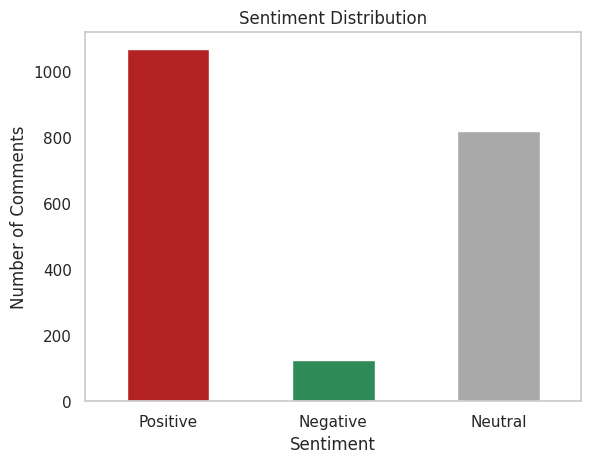

In [149]:
# visulaise sentiment breakdown

df_sm['sentiment_label'].value_counts().reindex(['Positive', 'Negative', 'Neutral']).plot(
    kind='bar',
    title='Sentiment Distribution',
    color=['#B22222', '#2E8B57', '#A9A9A9']
)

plt.xlabel("Sentiment")
plt.ylabel("Number of Comments")
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

#### Visualise Sentiment Breakdown by Platform

In [150]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

# Dropdown widget for platform selection
platform_dropdown = widgets.Dropdown(
    options=df_sm['source'].unique().tolist(),
    description='Platform:',
    layout=widgets.Layout(width='40%')
)

# Function to plot sentiment for selected platform
def plot_sentiment_by_platform(selected_platform):
    filtered_df = df_sm[df_sm['source'] == selected_platform]
    sentiment_counts = filtered_df['sentiment_label'].value_counts(normalize=True)

    # Ensure all three categories are present
    sentiment_order = ['Positive', 'Negative', 'Neutral']
    sentiment_counts = sentiment_counts.reindex(sentiment_order, fill_value=0)

    # Plot
    sentiment_counts.plot(
        kind='bar',
        title=f'Sentiment Distribution – {selected_platform}',
        color=['#B22222', '#2E8B57', '#A9A9A9']
    )
    plt.xlabel('Sentiment')
    plt.ylabel('Proportion')
    plt.grid(False)
    plt.xticks(rotation=0)
    plt.ylim(0, 1)
    plt.show()

# Link dropdown to plot function
widgets.interact(plot_sentiment_by_platform, selected_platform=platform_dropdown)

interactive(children=(Dropdown(description='Platform:', layout=Layout(width='40%'), options=('Instagram', 'Tik…

<function __main__.plot_sentiment_by_platform(selected_platform)>

In [151]:
df_sm['source'].value_counts()

,count
source,
Instagram,1394
TikTok,587
Facebook,29


In [152]:
df_sm.groupby('source')['sentiment_label'].value_counts()

source     sentiment_label
Facebook   Neutral             17
           Positive            11
           Negative             1
Instagram  Positive           752
           Neutral            584
           Negative            58
TikTok     Positive           304
           Neutral            217
           Negative            66
Name: count, dtype: int64

#### Wordcloud of Postive, Negative and Neutral Sentiments

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


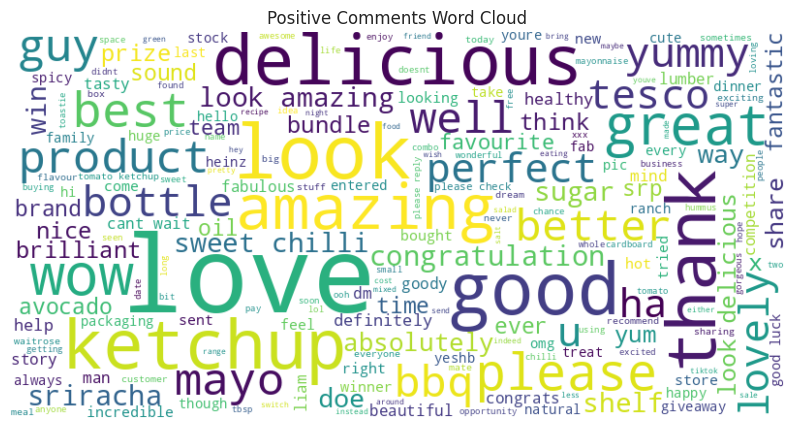

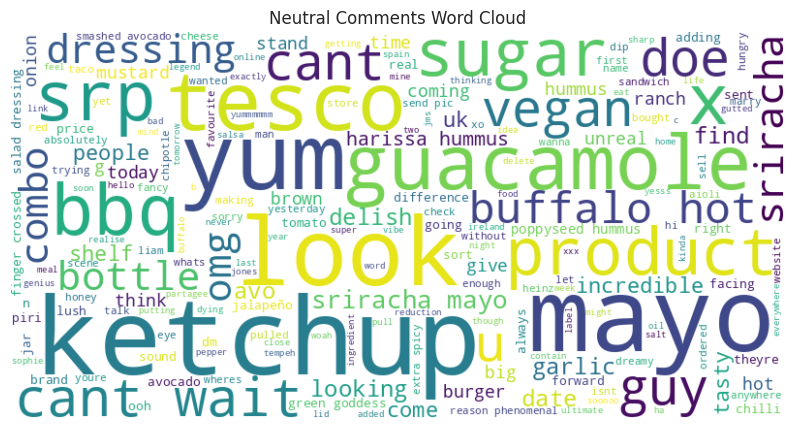

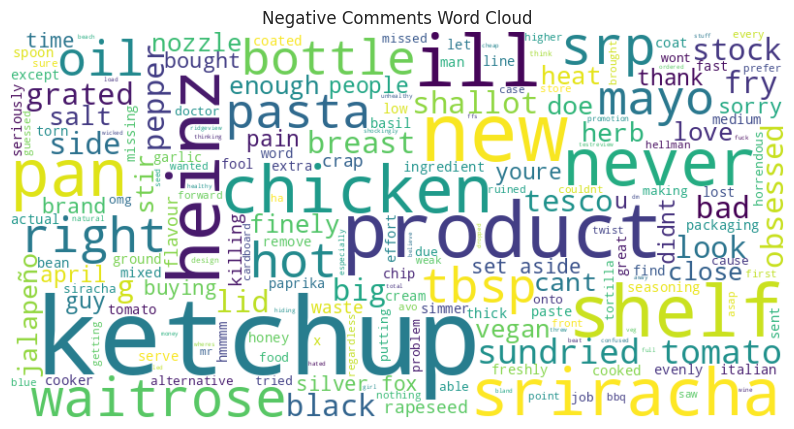

In [153]:
# Download stopwords if not already
import nltk
nltk.download('stopwords')

# Define stopwords (standard + custom)
custom_stopwords = set(stopwords.words('english'))
custom_stopwords.update([
    'one', 'get', 'just', 'like', 'would', 'can', 'really', 'got', 'im', 'id','ooh'
    'also', 'even', 'ive', 'want', 'go', 'make', 'dont', 'thats', 'need', 'dr','see'
    'youre', 'thing', 'use', 'try', 'still', 'oh', 'know', 'much', 'may', 'xx','srp'
    'good', 'yes', 'yeah', 'taste', 'tastes', 'sauce', 'nan','wa','cant' 'x','theyre'
    'look', 'see', 'get', 'put', 'buy', 'work', 'day', 'top', 'next',
    'also', 'gonna', 'thought', 'someone', 'everything', 'thing', 'anything',
    'use', 'add', 'done', 'back', 'could', 'keep', 'minute', 'level', 'still',
    'another', 'something', 'different', 'yeah', 'yes', 'oh','video'
])

# Define the function to plot word clouds
def plot_wordcloud(text, title):
    """Generates and displays a word cloud."""
    wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110,
                          background_color='white', stopwords=custom_stopwords).generate(text)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(title)
    plt.show()

# Prepare the text for word clouds (already in your code)
positive_text = ' '.join(df_sm[df_sm['sentiment_label'] == 'Positive']['clean_comment'].dropna())
neutral_text = ' '.join(df_sm[df_sm['sentiment_label'] == 'Neutral']['clean_comment'].dropna())
negative_text = ' '.join(df_sm[df_sm['sentiment_label'] == 'Negative']['clean_comment'].dropna())

# Call the function to plot word clouds
plot_wordcloud(positive_text, 'Positive Comments Word Cloud')
plot_wordcloud(neutral_text, 'Neutral Comments Word Cloud')
plot_wordcloud(negative_text, 'Negative Comments Word Cloud')

#  **TF - IDF & Theme Tagging**

In [154]:
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Define stopwords
stop_words = set(stopwords.words('english'))

# Tokenize negative comments
neg_comments = df_sm[df_sm['sentiment_label'] == 'Negative']['clean_comment'].dropna().tolist()
tokens = [
    word.lower()
    for comment in neg_comments
    for word in word_tokenize(comment)
    if word.isalpha() and word.lower() not in stop_words
]

# Count most common words
word_counts = Counter(tokens)
common_words = word_counts.most_common(50)
pd.DataFrame(common_words, columns=['Word', 'Frequency'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Word,Frequency
0,ketchup,17
1,sauce,16
2,wa,15
3,one,12
4,im,10
5,add,8
6,new,8
7,product,8
8,dr,7
9,taste,7


TF-IDF (Term Frequency-Inverse Document Frequency) to extract the top  keywords from the cleaned social media comments
Identify important words in a collection of texts (like comments or reviews) to understand which words are unique and meaningful in a specific comment compared to the rest of the dataset

In [155]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Convert all clean comments to string and ensure it's a list
texts = df_sm['clean_comment'].dropna().astype(str).tolist()

In [156]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import numpy as np

# Custom stopwords list
custom_stopwords = [
    'look', 'just', 'like', 'id', 'an', 'oh', 'yes', 'very', 'try', 'need', 'cant', 'please','done'
    'wa', 'won', 'also', 'one', 'nan', 'really', 'thing', 'nan', 'doe', 'would', 'one', 'love','think'
    'get', 'make', 'time', 'wait', 'thank', 'please','im', 'dr','guy','work','ive','shelf','ha','want',
]

# Combine with NLTK's English stopwords
all_stopwords = list(set(stopwords.words('english')) | set(custom_stopwords))

# Convert clean_comment to list of strings
texts = df_sm['clean_comment'].dropna().astype(str).tolist()

# Create and apply the vectorizer
vectorizer = TfidfVectorizer(stop_words=all_stopwords, max_features=30)
tfidf_matrix = vectorizer.fit_transform(texts)

# Get top keywords
tfidf_scores = np.asarray(tfidf_matrix.mean(axis=0)).flatten()
top_indices = tfidf_scores.argsort()[::-1][:30]
top_keywords = [(vectorizer.get_feature_names_out()[i], tfidf_scores[i]) for i in top_indices]

# Display as DataFrame
pd.DataFrame(top_keywords, columns=['Keyword', 'TF-IDF Score'])

,Keyword,TF-IDF Score
0,sauce,0.043706
1,ketchup,0.037398
2,good,0.028005
3,delicious,0.027935
4,mayo,0.025717
5,amazing,0.024691
6,wa,0.019909
7,wow,0.016499
8,get,0.015810
9,product,0.015545


In [157]:
# Define theme keywords
themes = {
    'high_approval': [
        'amazing', 'awesome', 'love', 'delicious', 'bundle', 'dream', 'yummy','delicious','congrats','wicked','killing','try','well done','delish','omg','lush','woweee'
        'congrats', 'great', 'good', 'brilliant', 'yum', 'exciting','wow', 'lovely', 'favourite','xxx','❤️','congratulations','rushing','huge','creation','fantastic'
        'unbelievale','hello', 'cute', 'fantastic', 'tasty', 'unreal', 'perfect', 'nice', 'thank', 'thanks', 'congratulation'

    ],
    'price_value': [
        'price', 'expensive', 'ordered', 'box', 'value', 'waitrose', 'srp', 'cost', 'money', 'cheap', 'deal', '£'
    ],
    'packaging_issue': [
        'squeeze', 'bottle', 'nozzle', 'kit', 'shrunk', 'jar', 'lid', 'top', 'packaging', 'cap', 'broken', 'seal','manufacture', 'combo', 'look'
    ],
    'taste_issue': [
        'taste', 'tastes', 'crap', 'bland', 'hot', 'sundried', 'pasta', 'chicken',
        'bad', 'flavour', 'awful', 'aftertaste', 'sour', 'weird', 'disgusting'
    ],
    'product_mismatch': [
        'sriracha', 'ketchup', 'wills', 'dr', 'heinz', 'mayo', 'sauce',
        'different', 'wrong', 'fake', 'misleading', 'label'
    ],
    'ingredient_concern': [
         'oil', 'tbsp', 'pan', 'add', 'new', 'vegan', 'tortilla',
        'egg', 'sugar', 'preservative', 'salt', 'ingredient','stevia'
        ],
    'retailer_reference': ['tesco', 'waitrose'],

}
# Function to assign a theme based on keywords
def assign_theme(comment):
    for theme, keywords in themes.items():
        if any(word in comment for word in keywords):
            return theme
    return 'other'

# themes and sentiment
df_sm['theme'] = df_sm['clean_comment'].apply(assign_theme)

# Apply the function to the filtered negative comments with your selected keywords
# Apply the function to ALL comments, regardless of sentiment
df_sm['theme'] = df_sm['clean_comment'].apply(assign_theme)

# Preview results
df_sm[['clean_comment', 'theme', 'final_sentiment_score','source']].head() # Changed 'sentiment_score' to 'final_sentiment_score' as used earlier
df_sm.head(5)

#Function to assign a theme based on keywords
def assign_theme(comment):
    for theme, keywords in themes.items():
        if any(word in comment for word in keywords):
            return theme
    return 'other'

# Themes and sentiment
df_sm['theme'] = df_sm['clean_comment'].apply(assign_theme)

# Apply the function to the filtered negative comments with your selected keywords
# Apply the function to ALL comments, regardless of sentiment
df_sm['theme'] = df_sm['clean_comment'].apply(assign_theme)

# Preview results
df_sm[['clean_comment', 'theme', 'final_sentiment_score','source']].head() # Changed 'sentiment_score' to 'final_sentiment_score' as used earlier
df_sm.head(5)

# Function to assign a theme based on keywords
def assign_theme(comment):
    for theme, keywords in themes.items():
        if any(word in comment for word in keywords):
            return theme
    return 'other'

# themes and sentiment
df_sm['theme'] = df_sm['clean_comment'].apply(assign_theme)

# Apply the function to the filtered negative comments with your selected keywords
# Apply the function to ALL comments, regardless of sentiment
df_sm['theme'] = df_sm['clean_comment'].apply(assign_theme)

# Preview results
df_sm[['clean_comment', 'theme', 'final_sentiment_score','source']].head() # Changed 'sentiment_score' to 'final_sentiment_score' as used earlier
df_sm.head(5)

#Function to assign a theme based on keywords
def assign_theme(comment):
    for theme, keywords in themes.items():
        if any(word in comment for word in keywords):
            return theme
    return 'other'

# themes and sentiment
df_sm['theme'] = df_sm['clean_comment'].apply(assign_theme)

# Apply the function to the filtered negative comments with your selected keywords
# Apply the function to ALL comments, regardless of sentiment
df_sm['theme'] = df_sm['clean_comment'].apply(assign_theme)

# Preview results
df_sm[['clean_comment', 'theme', 'final_sentiment_score','source']].head() # Changed 'sentiment_score' to 'final_sentiment_score' as used earlier
df_sm.head(5)

,comment,source,clean_comment,emoji_sentiment_score,vader_score,slang_sentiment_score,final_sentiment_score,sentiment_label,theme
0,Thank you so much for highlighting Mental Hea...,Instagram,thank you so much for highlighting mental heal...,0.0,0.9201,0.0,0.64407,Positive,high_approval
1,This bundle is a DREAM!,Instagram,this bundle is a dream,0.0,0.2500,0.0,0.17500,Positive,high_approval
2,Wow looks great! I’ve entered,Instagram,wow look great ive entered,0.0,0.8360,0.0,0.58520,Positive,high_approval
3,Brilliant bundle! Good luck everyone!,Instagram,brilliant bundle good luck everyone,0.0,0.8658,0.0,0.60606,Positive,high_approval
4,"Mmm, delicious",Instagram,mmm delicious,0.0,0.5719,0.0,0.40033,Positive,high_approval


In [158]:
df_sm.groupby('source').apply(lambda x: x.sample(2))  #this confirms the comments above are not just instagram

/tmp/ipython-input-158-874394620.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sm.groupby('source').apply(lambda x: x.sample(2))  #this confirms the comments above are not just instagram


comment     source  \
source                                                                         
Facebook  2388       The best ketchup and BBQ sauce I ever had 😍😍   Facebook   
          2394   Tasty, healthy and my kid loves them. Heinz who?   Facebook   
Instagram 1410                                             Gorge   Instagram   
          1356                                  MUSHROOM KETCHUP   Instagram   
TikTok    1984  Stores do something called ‘facing up’ where p...     TikTok   
          2197     Almost double the price for half the product 🤣     TikTok   

                                                    clean_comment  \
source                                                              
Facebook  2388       the best ketchup and bbq sauce i ever had 😍😍   
          2394       tasty healthy and my kid love them heinz who   
Instagram 1410                                              gorge   
          1356                                   mushroom ketchup   
TikTok    1984  store do something called facing up where prod...   
          2197     almost double the price for half the product 🤣   

                emoji_sentiment_score  vader_score  slang_sentiment_score  \
source                                                                      
Facebook  2388                    5.0       0.8807                    0.0   
          2394                    0.0       0.7845                    0.0   
Instagram 1410                    0.0       0.0000                    0.0   
          1356                    0.0       0.0000                    0.0   
TikTok    1984                    0.0       0.0000                    0.0   
          2197                    2.5       0.4939                    0.0   

                final_sentiment_score sentiment_label             theme  
source                                                                   
Facebook  2388                1.61649        Positive  product_mismatch  
          2394                0.54915        Positive     high_approval  
Instagram 1410                0.00000         Neutral             other  
          1356                0.00000         Neutral  product_mismatch  
TikTok    1984                0.00000         Neutral             other  
          2197                0.84573        Positive       price_value

### Distribution of Themes

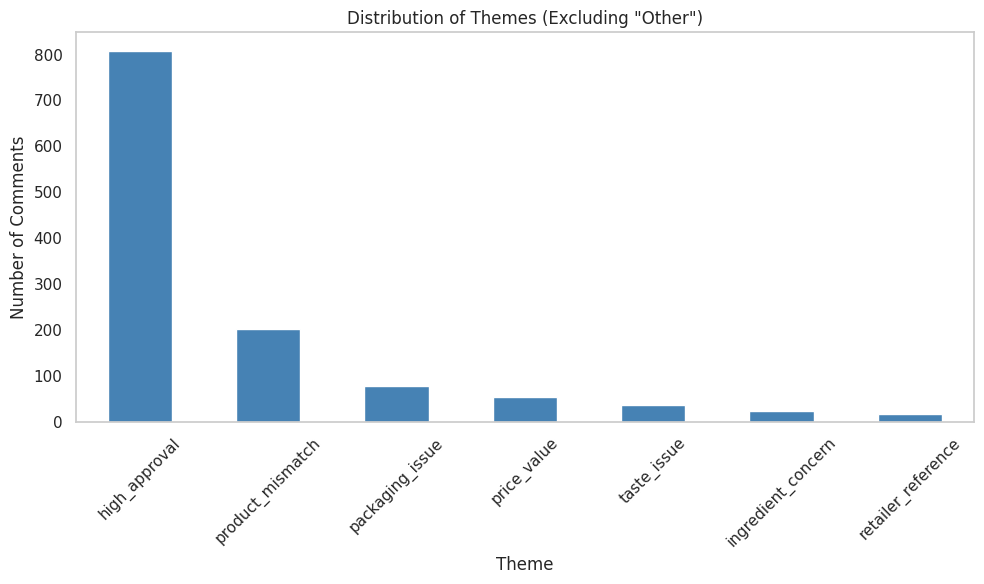

In [159]:
#  Count and filter out 'other'
theme_counts = df_sm['theme'].value_counts()
theme_counts = theme_counts[theme_counts.index != 'other']  # Exclude 'other'

# Color palette
colors = ['steelblue']

#  Plot
plt.figure(figsize=(10, 6))
theme_counts.plot(
    kind='bar',
    color=colors[:len(theme_counts)],  # Match number of bars
)

plt.title('Distribution of Themes (Excluding "Other")')
plt.xlabel('Theme')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(False)
plt.show()


### LDA Topic Modeling (Theme : "Other")




In [160]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Filter only 'other' comments
other_comments = df_sm[df_sm['theme'] == 'other']['clean_comment'].dropna()

# Vectorize the text (Bag of Words)
vectorizer = CountVectorizer(
    stop_words='english',
    max_df=0.95,
    min_df=2
)
X = vectorizer.fit_transform(other_comments)

# Fit LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)  # change 5 to however many themes you want to explore
lda.fit(X)

# Display top words per topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"\n Topic {topic_idx + 1}:")
        print("  ", ", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Show the top 8 words per topic
display_topics(lda, vectorizer.get_feature_names_out(), no_top_words=8)


 Topic 1:
   nan, doe, like, work, liam, really, coming, youre

 Topic 2:
   make, need, want, ranch, im, pic, wa, uk

 Topic 3:
   yes, oh, guy, right, just, marry, wanna, thats

 Topic 4:
   dm, time, ive, id, check, avocado, happy, product

 Topic 5:
   wa, best, did, buy, way, im, dont, product


In [161]:
# Total number of comments
total_comments = len(df_sm)

# Number of comments labeled as 'other'
other_comments = len(df_sm[df_sm['theme'] == 'other'])

# Percentage of 'other' comments
other_percentage = (other_comments / total_comments) * 100

print(f"{other_comments} out of {total_comments} comments are labeled as 'other' ({other_percentage:.2f}%)")

793 out of 2010 comments are labeled as 'other' (39.45%)


### Sentiment Distribution by Theme

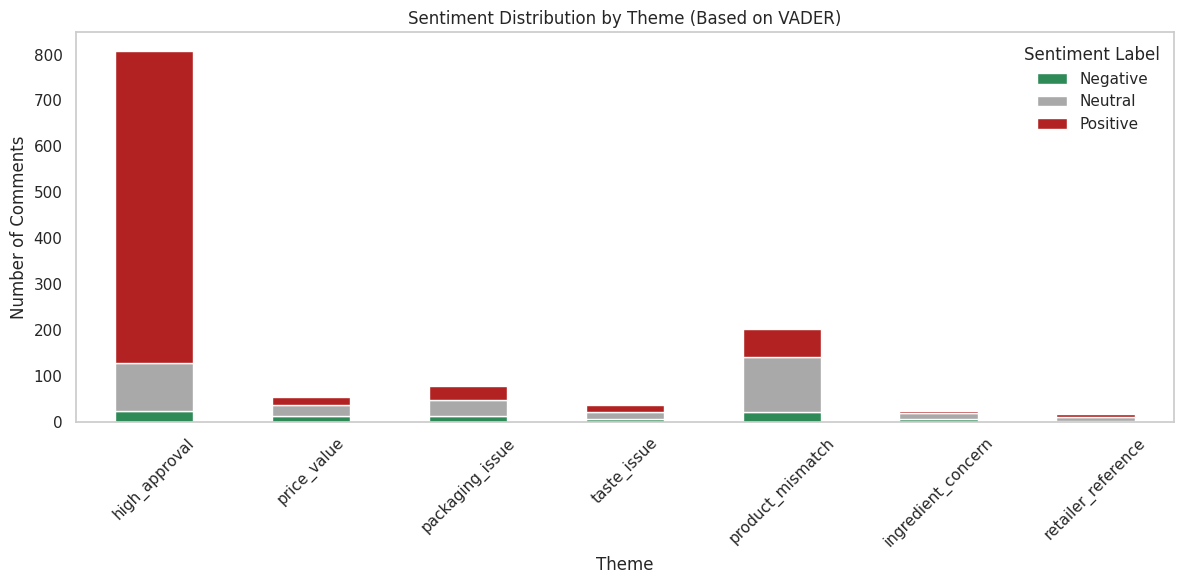

In [162]:
# Group by theme and sentiment label
theme_sentiment_counts = (
    df_sm.groupby(['theme', 'sentiment_label'])
    .size()
    .unstack(fill_value=0)
)

# Optional: sort by theme name
theme_sentiment_counts = theme_sentiment_counts.loc[
    [
        'high_approval',
        'price_value',
        'packaging_issue',
        'taste_issue',
        'product_mismatch',
        'ingredient_concern',
        'retailer_reference'
    ]
]

# Plot
theme_sentiment_counts.plot(kind='bar', stacked=True, figsize=(12,6), color=['#2E8B57', '#A9A9A9', '#B22222'])
plt.title("Sentiment Distribution by Theme (Based on VADER)")
plt.ylabel("Number of Comments")
plt.xlabel("Theme")
plt.xticks(rotation=45)
plt.legend(title='Sentiment Label')
plt.tight_layout()
plt.grid(False)
plt.show()


In [163]:
display_topics(lda, vectorizer.get_feature_names_out(), no_top_words=8)


 Topic 1:
   nan, doe, like, work, liam, really, coming, youre

 Topic 2:
   make, need, want, ranch, im, pic, wa, uk

 Topic 3:
   yes, oh, guy, right, just, marry, wanna, thats

 Topic 4:
   dm, time, ive, id, check, avocado, happy, product

 Topic 5:
   wa, best, did, buy, way, im, dont, product


# **N-Grams - Top 5 Bigrams and Trigrams**

### Analysing Top N-Grams by Platform

#### Postive N-Grams

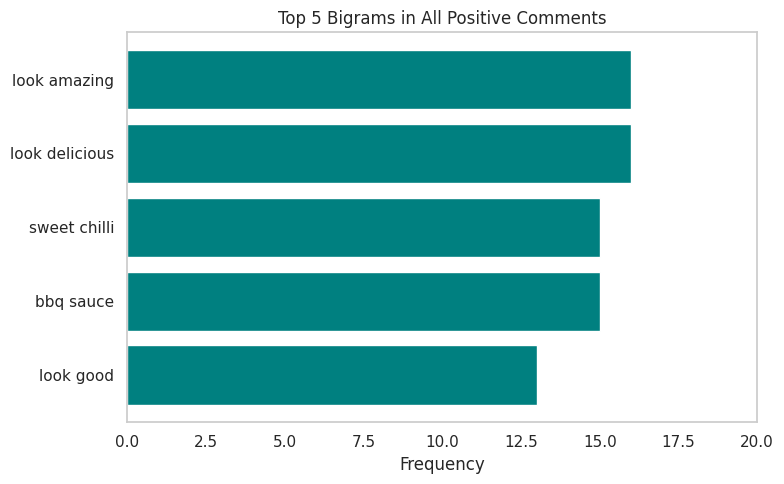

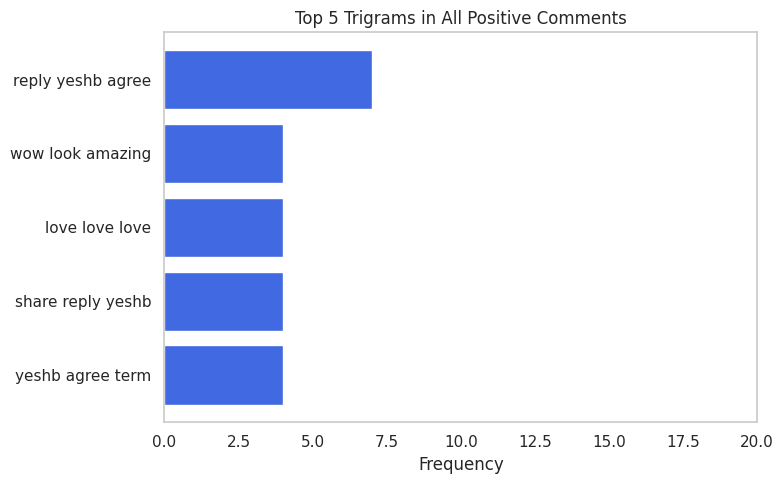

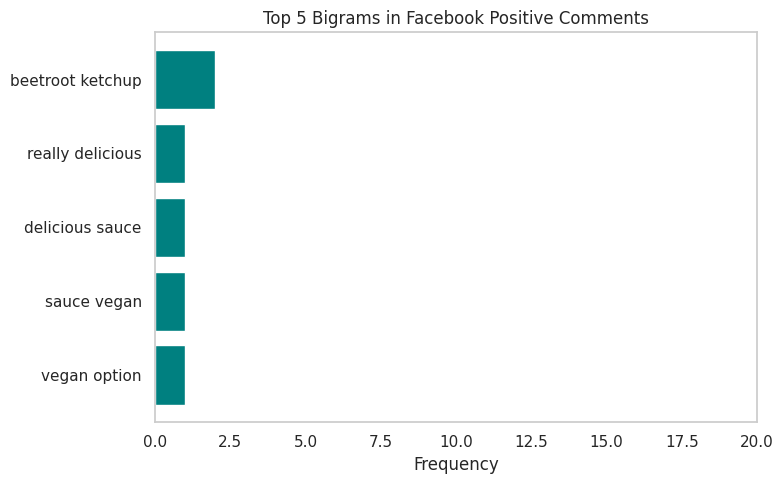

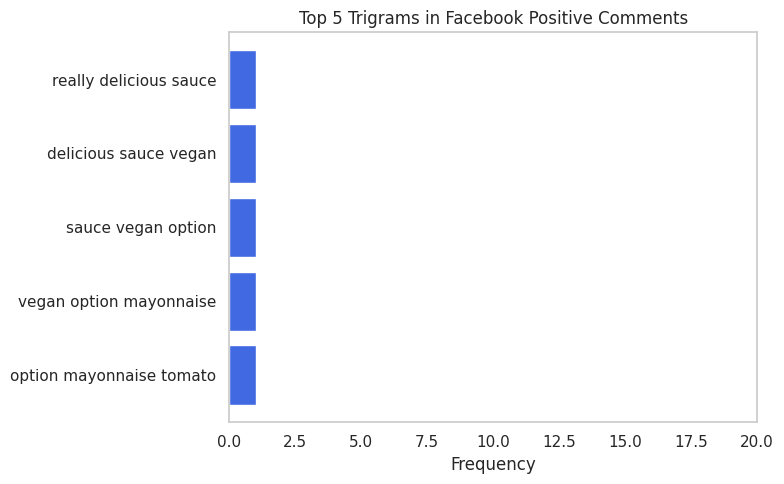

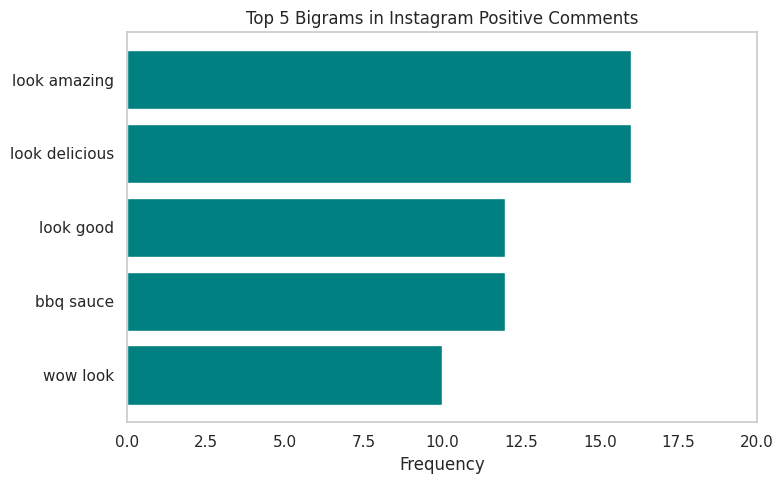

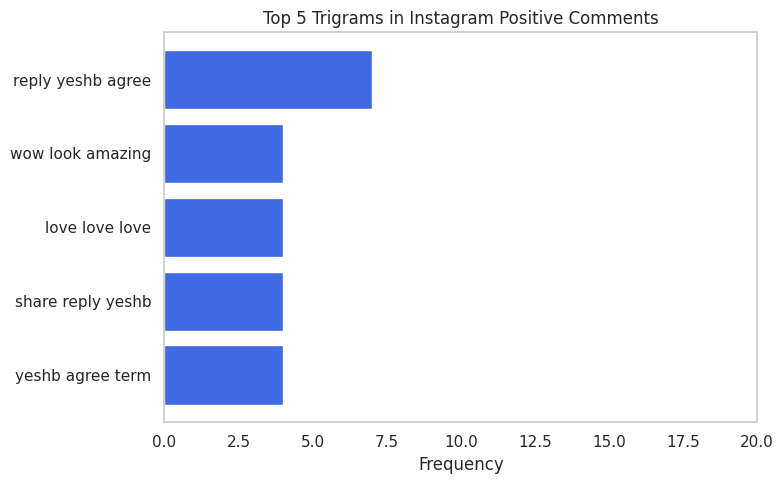

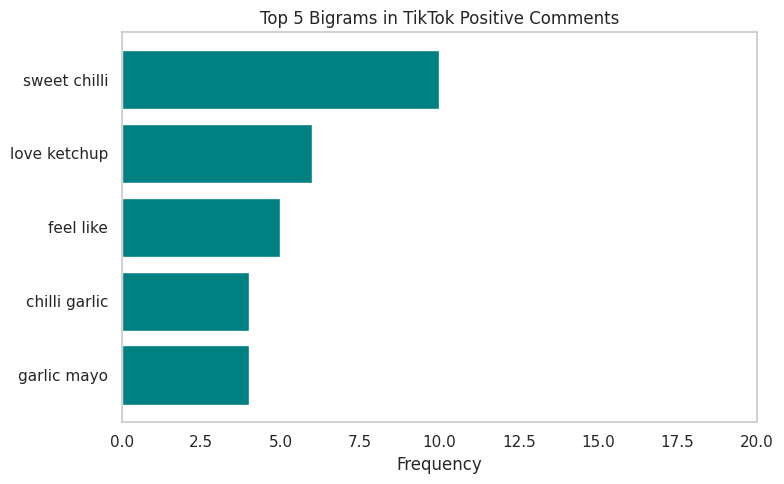

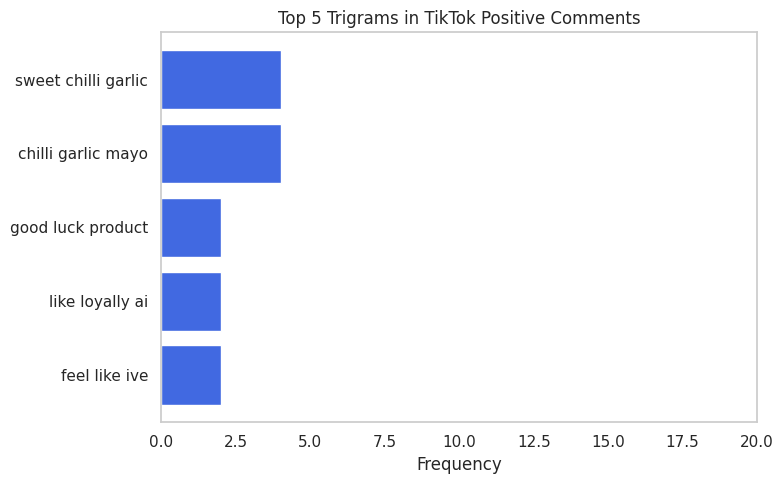

In [164]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

def plot_top_ngrams(corpus, ngram_range=(2, 2), top_n=5, title="Top N-grams", color='#2E8B57'):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    X = vectorizer.fit_transform(corpus)
    sum_words = X.sum(axis=0)
    words_freq = [(word, int(sum_words[0, idx])) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:top_n]

    if words_freq:
        ngrams, counts = zip(*words_freq)
        plt.figure(figsize=(8, 5))
        plt.barh(ngrams[::-1], counts[::-1], color=color)
        plt.xlabel("Frequency")
        plt.title(title)
        plt.grid(False)
        plt.xlim(0, 20)
        plt.tight_layout()
        plt.show()
    else:
        print("No comments available for this selection.")

# List of platforms
platforms = ['All', 'Facebook', 'Instagram', 'TikTok']

# Loop through platforms
for platform in platforms:
    if platform == 'All':
        filtered_comments = df_sm[df_sm['sentiment_label'] == 'Positive']['clean_comment'].dropna().astype(str).tolist()
    else:
        filtered_comments = df_sm[
            (df_sm['sentiment_label'] == 'Positive') &
            (df_sm['source'] == platform)
        ]['clean_comment'].dropna().astype(str).tolist()

    # Plot bigrams
    plot_top_ngrams(
        filtered_comments,
        ngram_range=(2, 2),
        top_n=5,
        title=f"Top 5 Bigrams in {platform} Positive Comments",
        color='Teal'
    )

    # Plot trigrams
    plot_top_ngrams(
        filtered_comments,
        ngram_range=(3, 3),
        top_n=5,
        title=f"Top 5 Trigrams in {platform} Positive Comments",
        color='royalblue'
    )


#### Negative & Neutral N-Grams

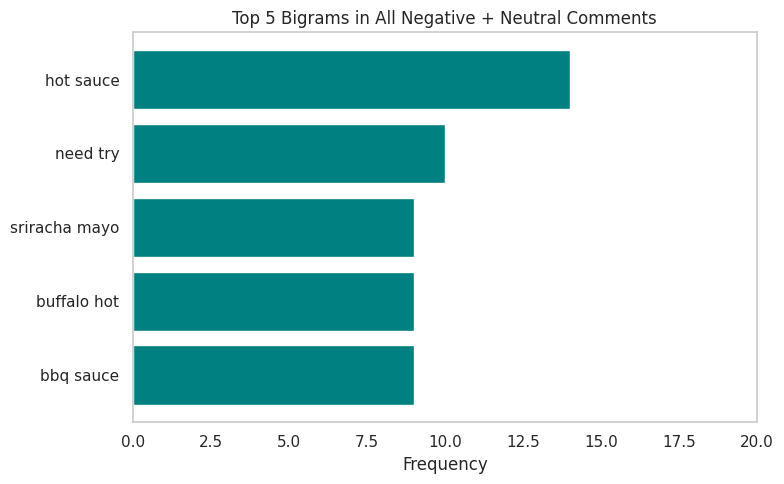

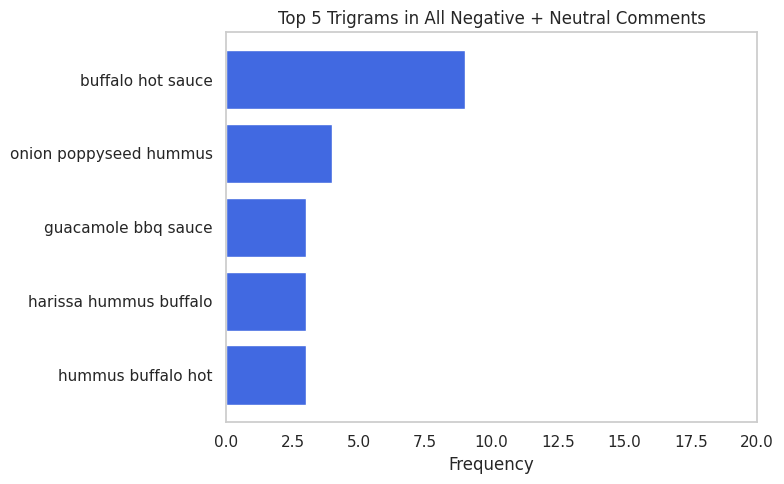

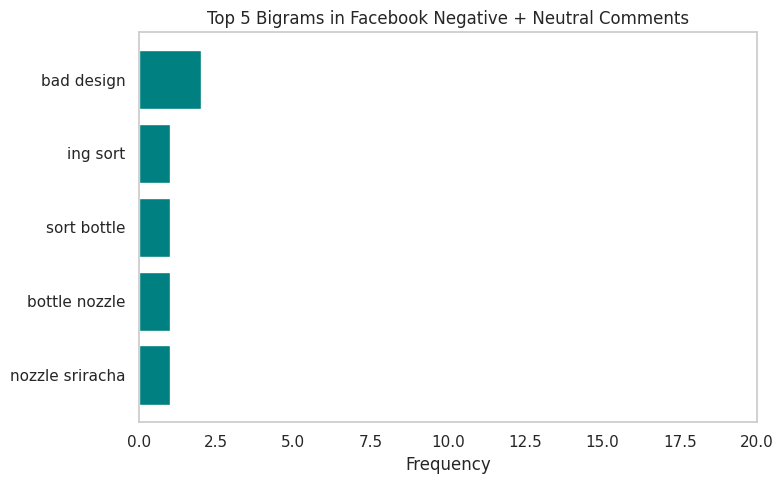

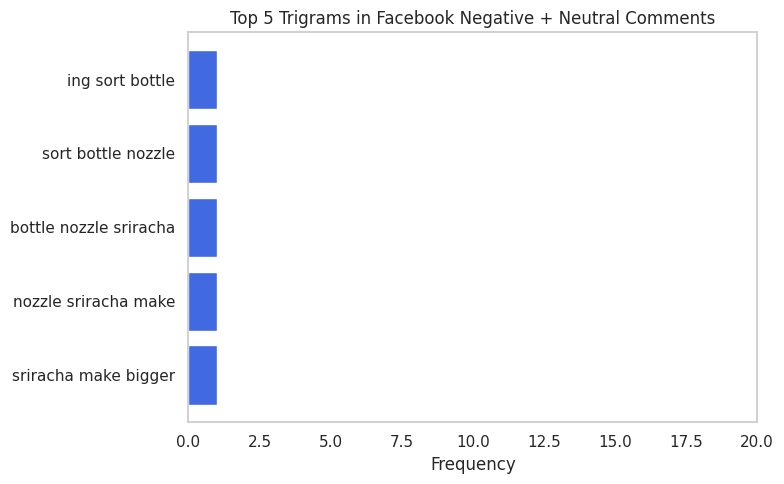

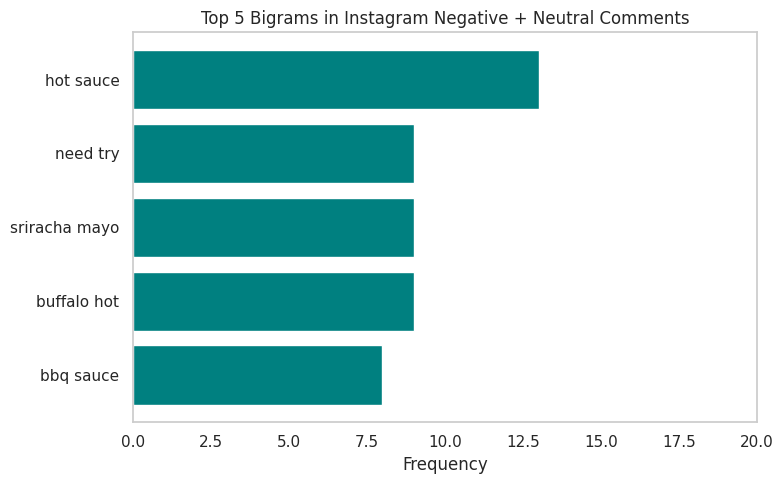

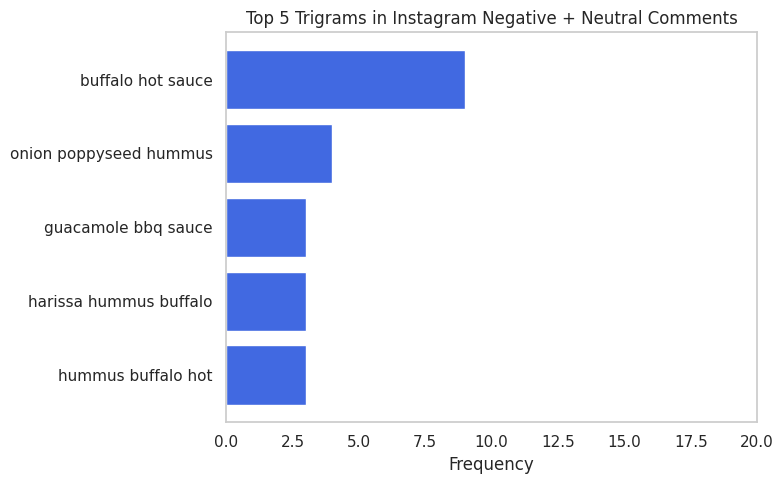

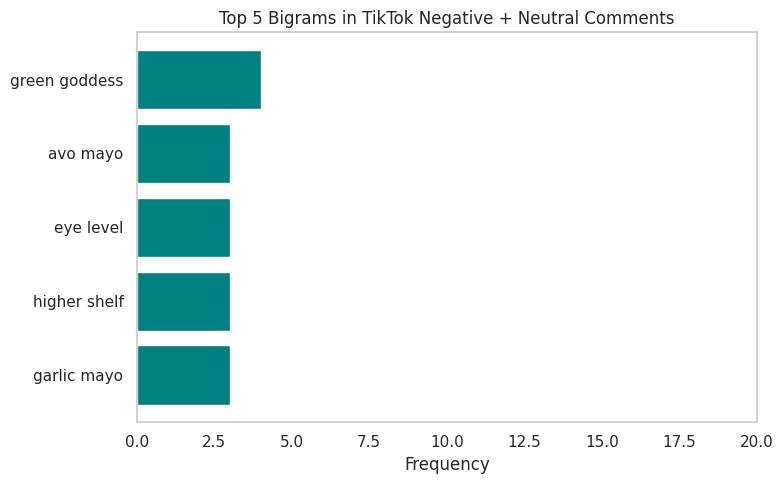

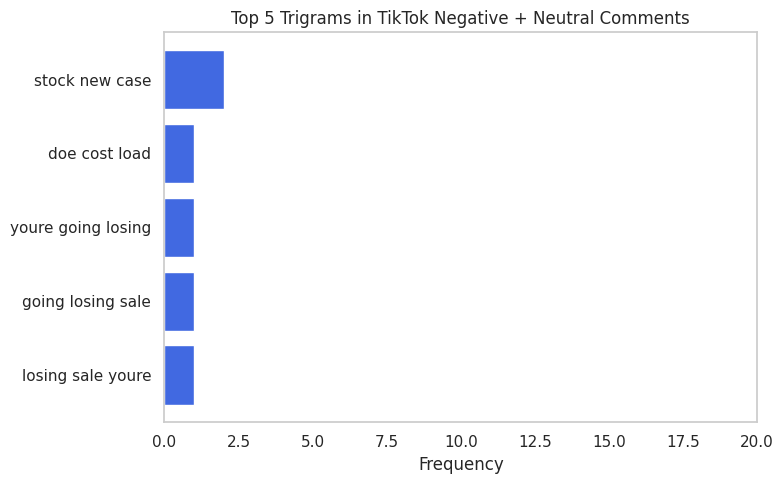

In [165]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Function to plot n-grams with fixed x-axis
def plot_top_ngrams(corpus, ngram_range=(2, 2), top_n=5, title="Top N-grams", color='#2E8B57'):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    X = vectorizer.fit_transform(corpus)
    sum_words = X.sum(axis=0)
    words_freq = [(word, int(sum_words[0, idx])) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:top_n]

    if words_freq:
        ngrams, counts = zip(*words_freq)
        plt.figure(figsize=(8, 5))
        plt.barh(ngrams[::-1], counts[::-1], color=color)
        plt.xlabel("Frequency")
        plt.title(title)
        plt.grid(False)
        plt.xlim(0, 20)
        plt.tight_layout()
        plt.show()
    else:
        print("No comments available for this selection.")

# Platforms to analyze
platforms = ['All', 'Facebook', 'Instagram', 'TikTok']

# Loop through each platform and analyze Negative + Neutral
for platform in platforms:
    if platform == 'All':
        filtered_comments = df_sm[
            df_sm['sentiment_label'].isin(['Negative', 'Neutral'])
        ]['clean_comment'].dropna().astype(str).tolist()
    else:
        filtered_comments = df_sm[
            (df_sm['sentiment_label'].isin(['Negative', 'Neutral'])) &
            (df_sm['source'] == platform)
        ]['clean_comment'].dropna().astype(str).tolist()

    # Plot bigrams
    plot_top_ngrams(
        filtered_comments,
        ngram_range=(2, 2),
        top_n=5,
        title=f"Top 5 Bigrams in {platform} Negative + Neutral Comments",
        color='Teal'
    )

    # Plot trigrams
    plot_top_ngrams(
        filtered_comments,
        ngram_range=(3, 3),
        top_n=5,
        title=f"Top 5 Trigrams in {platform} Negative + Neutral Comments",
        color='royalblue'
    )


In [166]:
# Look at raw comments containing both words in the bigram
df_sm[
    (df_sm['sentiment_label'].isin(['Negative', 'Neutral'])) &
    (df_sm['clean_comment'].str.contains(r'\bwait\b')) &
    (df_sm['clean_comment'].str.contains(r'\btry\b'))
][['clean_comment', 'theme','sentiment_label']].head(10)

,clean_comment,theme,sentiment_label
742,i cant wait to try this,high_approval,Neutral
844,we cant wait to try it,high_approval,Neutral
1277,picked up the red one yesterday cant wait to t...,high_approval,Neutral
1389,agh just ordered cant wait for them to arrive ...,high_approval,Neutral
1420,cant wait to try this,high_approval,Neutral
1739,ohhh just come across your product cant wait t...,high_approval,Neutral
2103,cant wait to try do you have mayo without egg,high_approval,Neutral


### Analysing Top N-Grams by Theme

All N-grams are used for targeted exploration of consumer sentiment patterns and ambiguous customer sentiment For example : analyzing the taste_issue theme revealed that bigrams like ‘hot sauce’, ‘buffalo hot’, and ‘sriracha mayo’ appeared most frequently. This indicates concentrated feedback around certain flavor variants, suggesting that these may be polarizing or need clearer communication around spiciness and ingredients.”

In [167]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams_by_theme(theme_name, n=15):
    theme_texts = df_sm[df_sm['theme'] == theme_name]['clean_comment']
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english')
    X = vec.fit_transform(theme_texts)
    sums = X.sum(axis=0)
    freqs = [(word, sums[0, idx]) for word, idx in vec.vocabulary_.items()]
    freqs = sorted(freqs, key=lambda x: x[1], reverse=True)[:n]
    return freqs

get_top_ngrams_by_theme('taste_issue')

[('hot sauce', np.int64(16)),
 ('buffalo hot', np.int64(9)),
 ('taste like', np.int64(3)),
 ('harissa hummus', np.int64(3)),
 ('hummus buffalo', np.int64(3)),
 ('hot honey', np.int64(2)),
 ('sauce guacamole', np.int64(2)),
 ('doe taste', np.int64(1)),
 ('like shire', np.int64(1)),
 ('like chutney', np.int64(1)),
 ('chutney maybe', np.int64(1)),
 ('maybe nduja', np.int64(1)),
 ('nduja style', np.int64(1)),
 ('style hot', np.int64(1)),
 ('sauce oil', np.int64(1))]

#### Bigram by Theme

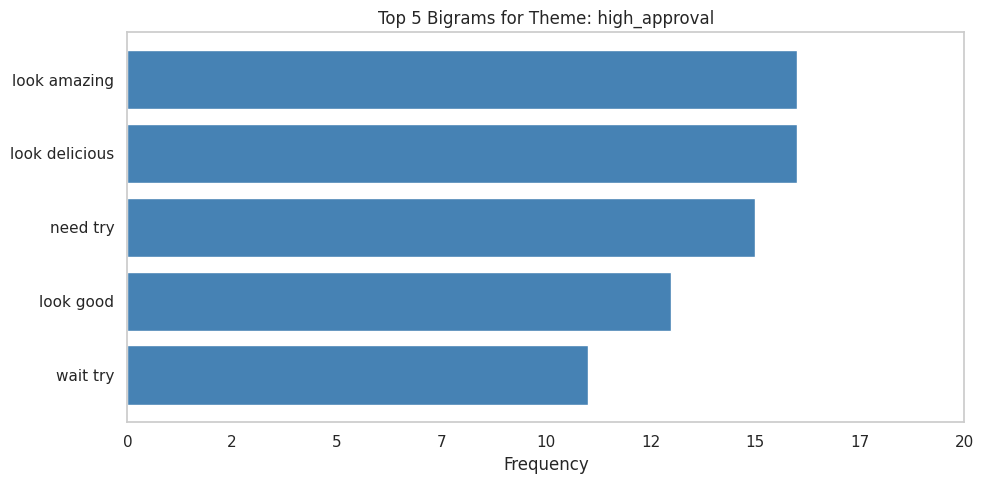

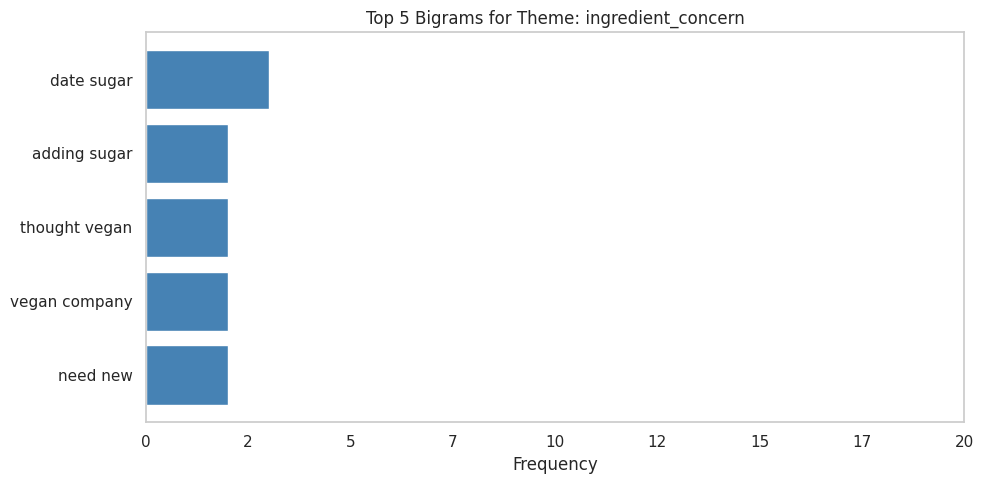

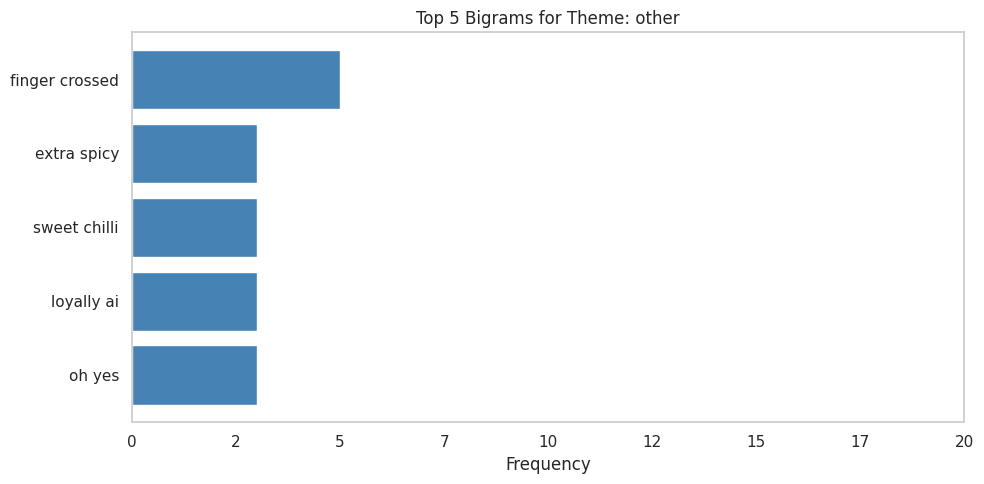

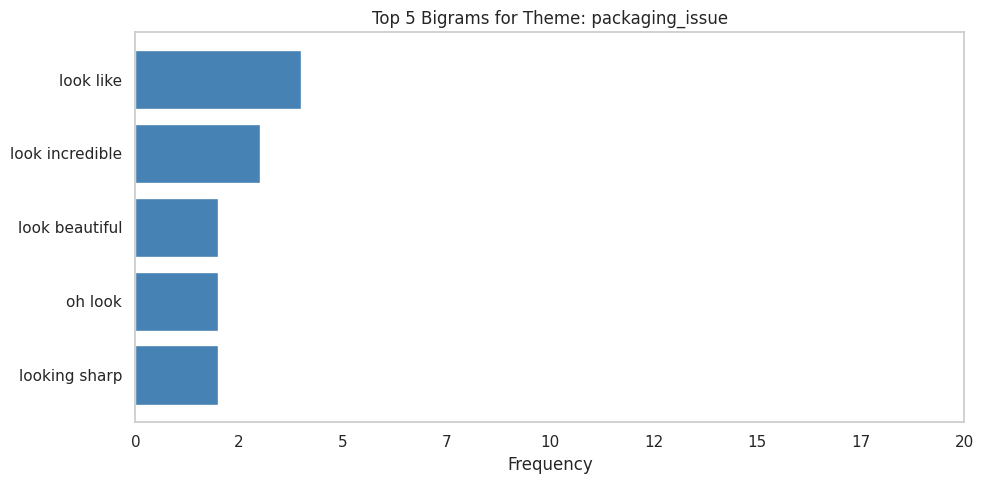

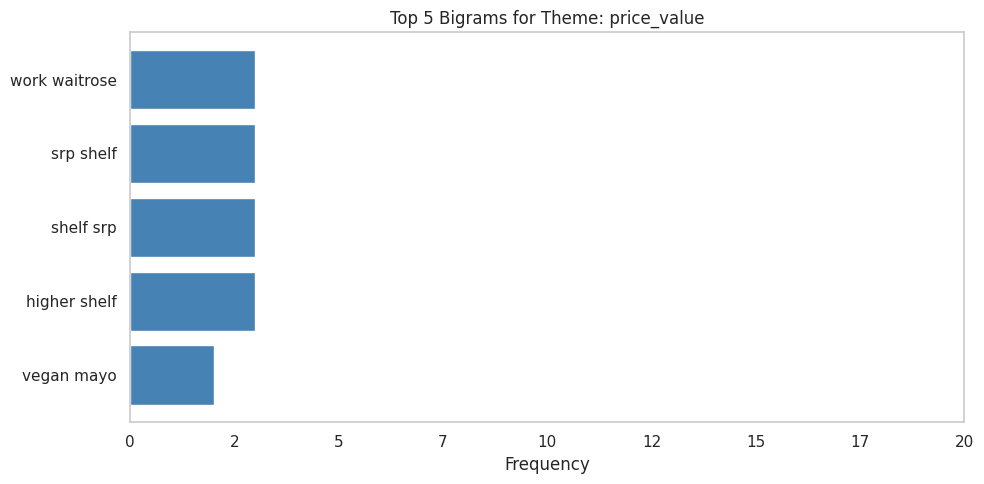

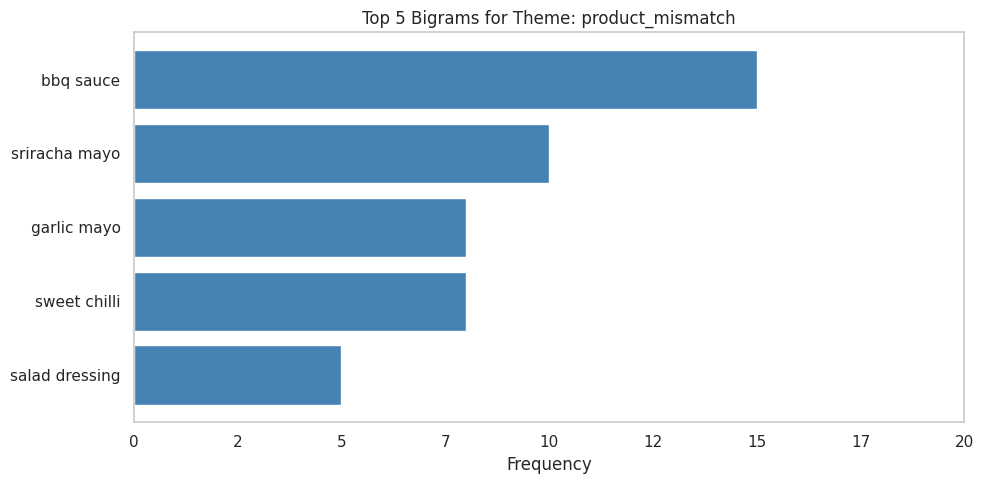

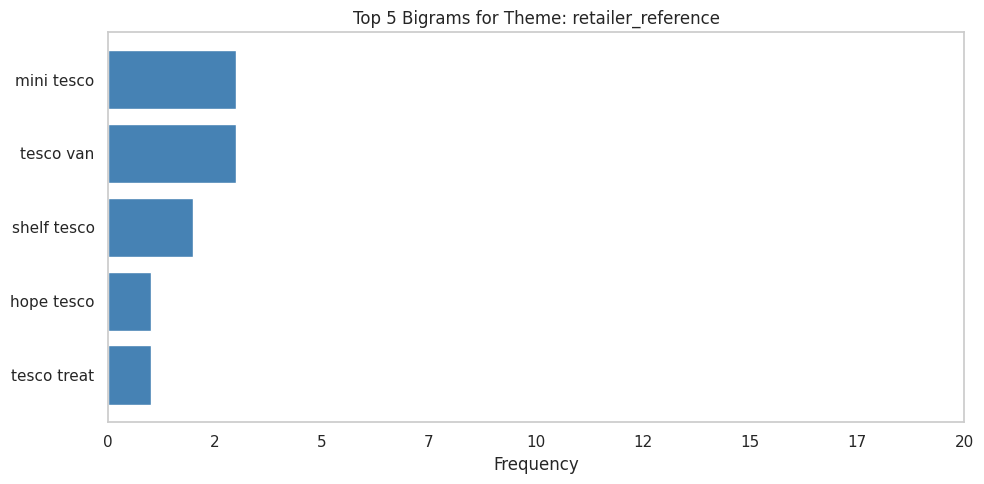

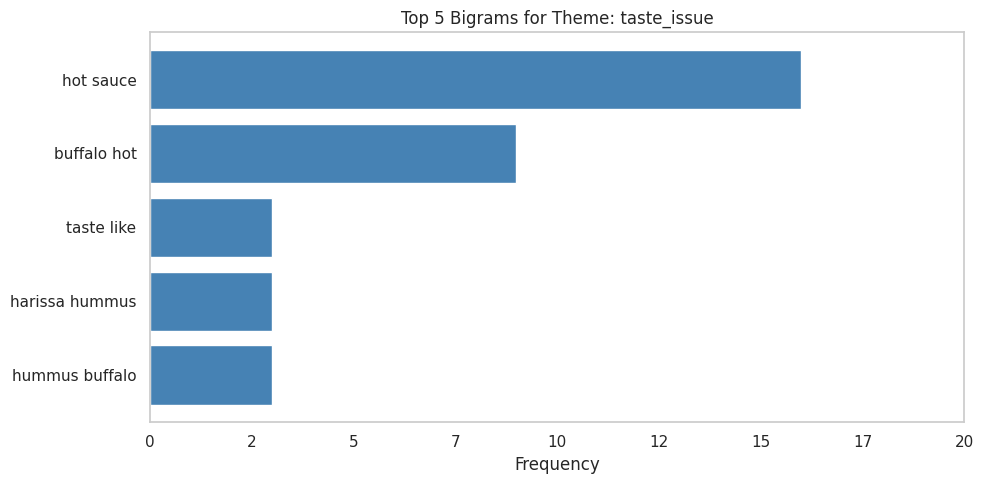

In [168]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Get unique themes (excluding 'other' if you want)
themes = sorted(df_sm['theme'].dropna().unique().tolist())

# Loop through each theme and plot bigrams
for theme in themes:
    comments = df_sm[(df_sm['theme'] == theme) & (df_sm['clean_comment'].notna())]['clean_comment'].astype(str).tolist()

    if not comments:
        print(f"No comments found for theme: {theme}")
        continue

    vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
    X = vectorizer.fit_transform(comments)
    sum_words = X.sum(axis=0)
    words_freq = [(word, int(sum_words[0, idx])) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:5]

    if words_freq:
        ngrams, counts = zip(*words_freq)
        plt.figure(figsize=(10, 5))
        plt.barh(ngrams[::-1], counts[::-1], color='steelblue')
        plt.title(f"Top 5 Bigrams for Theme: {theme}")
        plt.xlabel("Frequency")
        plt.grid(False)
        plt.xlim(0, 20)
        plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
        plt.tight_layout()
        plt.show()
    else:
        print(f"No valid bigrams for theme: {theme}")


#### Trigram by Theme

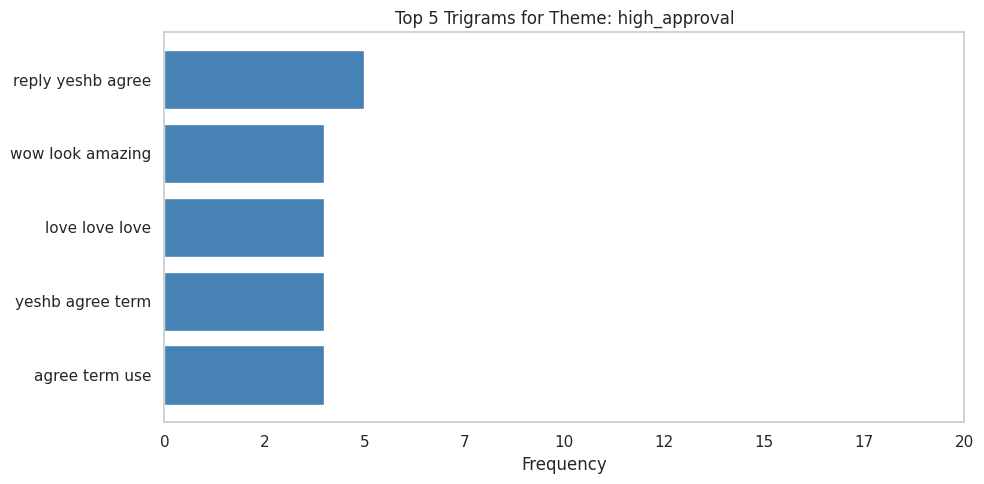

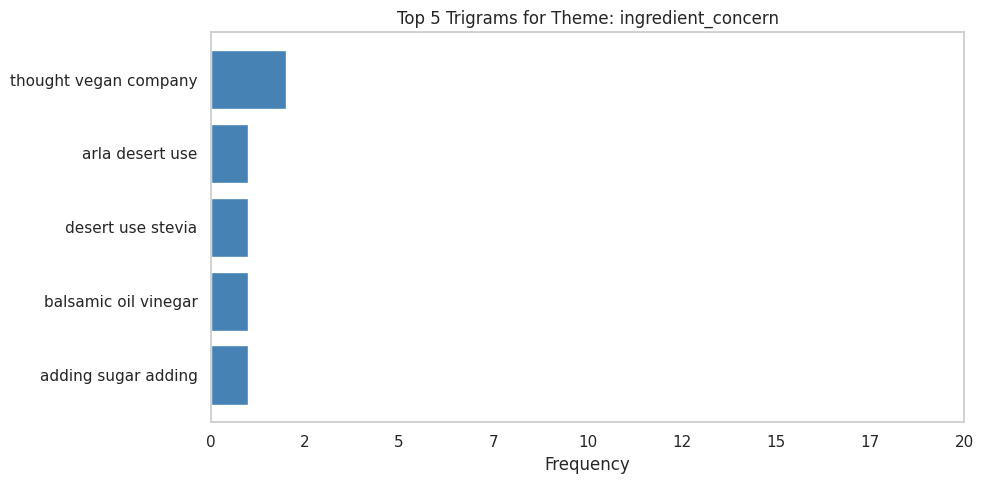

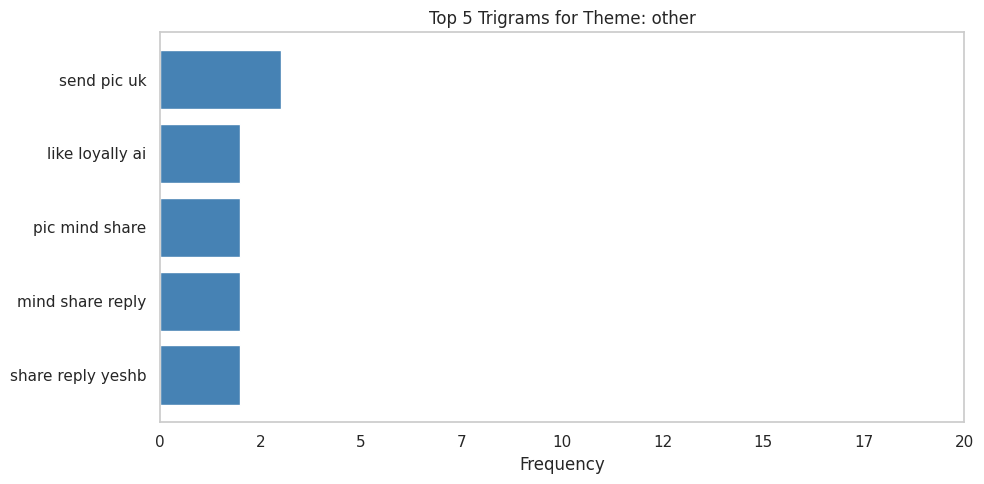

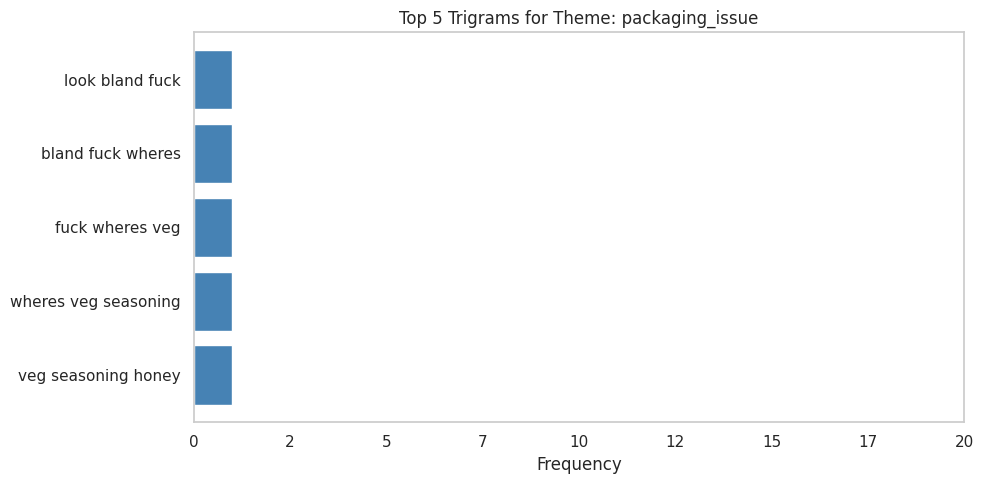

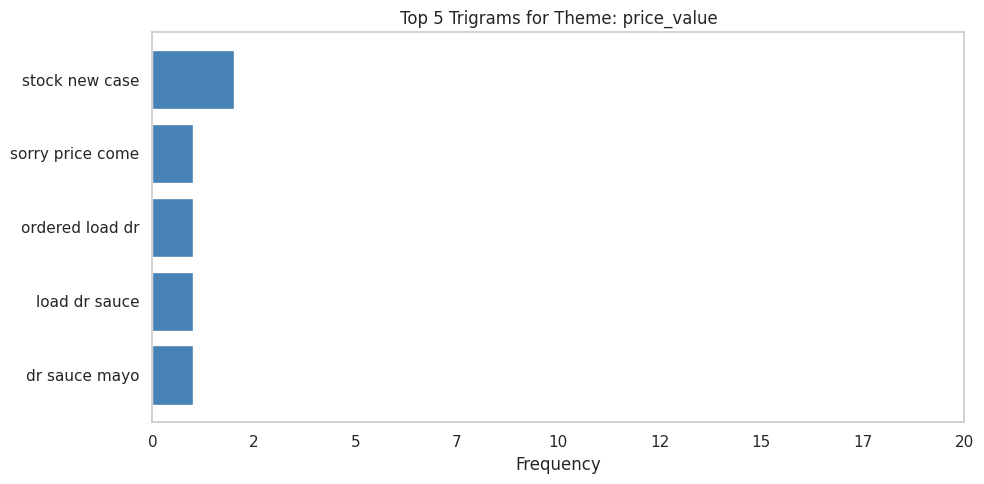

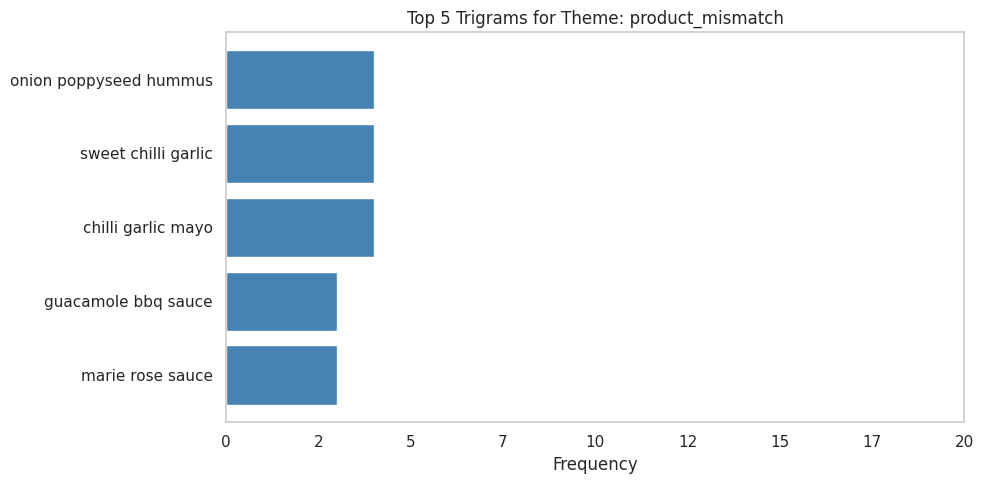

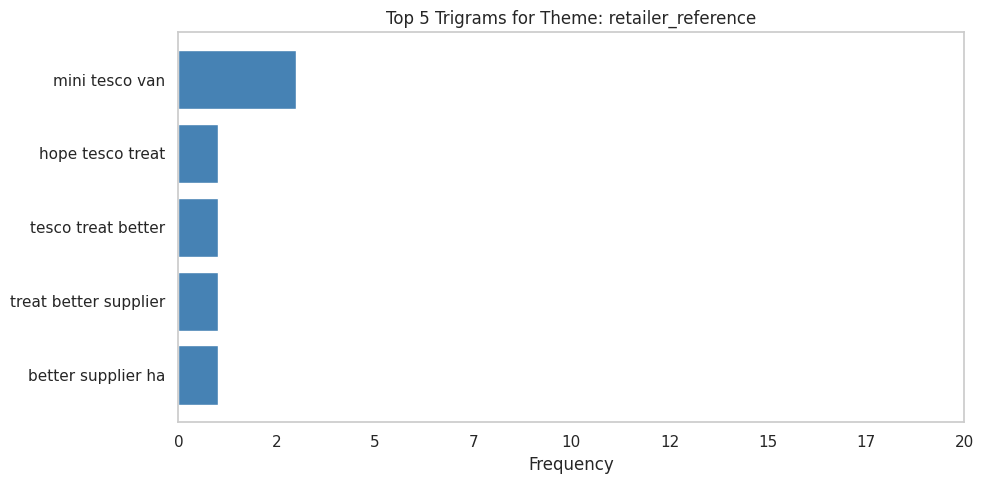

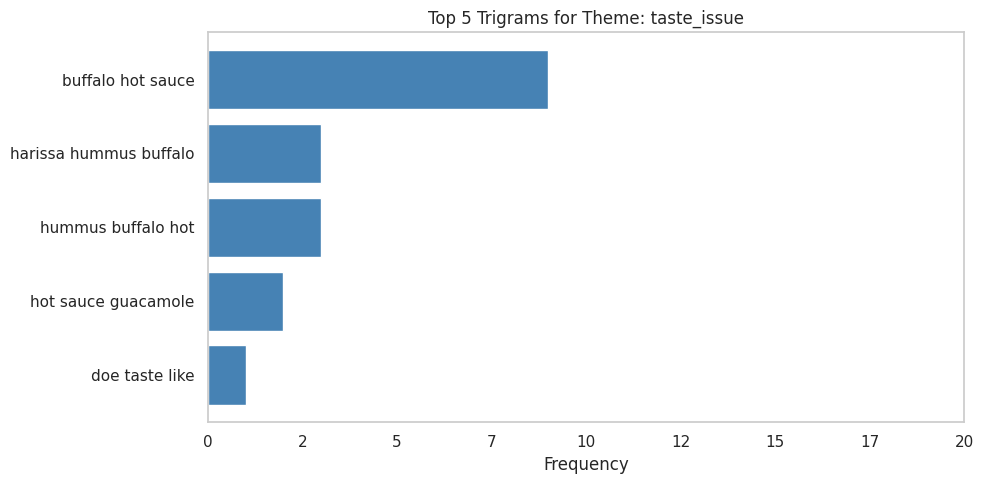

In [169]:
# Get unique themes (excluding 'other' if you want)
themes = sorted(df_sm['theme'].dropna().unique().tolist())

# Loop through each theme and plot bigrams
for theme in themes:
    comments = df_sm[(df_sm['theme'] == theme) & (df_sm['clean_comment'].notna())]['clean_comment'].astype(str).tolist()

    if not comments:
        print(f"No comments found for theme: {theme}")
        continue

    vectorizer = CountVectorizer(ngram_range=(3, 3), stop_words='english')
    X = vectorizer.fit_transform(comments)
    sum_words = X.sum(axis=0)
    words_freq = [(word, int(sum_words[0, idx])) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:5]

    if words_freq:
        ngrams, counts = zip(*words_freq)
        plt.figure(figsize=(10, 5))
        plt.barh(ngrams[::-1], counts[::-1], color='steelblue')
        plt.title(f"Top 5 Trigrams for Theme: {theme}")
        plt.xlabel("Frequency")
        plt.grid(False)
        plt.xlim(0, 20)
        plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
        plt.tight_layout()
        plt.show()
    else:
        print(f"No valid bigrams for theme: {theme}")

# **Social Media Platform Analysis**
Theme Frequency across platforms : Understand whether certain themes (e.g., taste, packaging) are more common or severe on specific platforms (Instagram, TikTok, Facebook), revealing differences in audience perception and content interaction styles.

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets

# Filter to exclude 'other' theme and only Negative/Neutral sentiments
theme_platform = df_sm[
    (df_sm['sentiment_label'].isin(['Negative', 'Neutral'])) &
    (df_sm['theme'] != 'other')
].groupby(['source', 'theme']).size().reset_index(name='count')

# Dropdown widget for source selection
source_dropdown = widgets.Dropdown(
    options=sorted(theme_platform['source'].unique()),
    description='Source:',
    layout=widgets.Layout(width='50%')
)

# Plotting function with enhancements
def plot_theme_distribution(source):
    data = theme_platform[theme_platform['source'] == source].sort_values('count', ascending=False)

    plt.figure(figsize=(12, 6))
    ax = sns.barplot(data=data, x='theme', y='count', palette='pastel')
    plt.title(f'Theme Frequency on {source} (Negative & Neutral Comments)', fontsize=16)
    plt.xlabel('Theme', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45)

    # Annotate counts on bars
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=11,
                    color='black', xytext=(0, 5),
                    textcoords='offset points')

    plt.tight_layout()
    plt.grid(False)
    plt.show()

# Display interactive dropdown and plot
widgets.interact(plot_theme_distribution, source=source_dropdown)


interactive(children=(Dropdown(description='Source:', layout=Layout(width='50%'), options=('Facebook', 'Instag…

<function __main__.plot_theme_distribution(source)>

#### Tone Analysis by Platform
Calculate average sentiment scores (e.g., VADER compound) and sentiment label distributions per platform.


/tmp/ipython-input-171-693361799.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_sentiment, x='source', y='final_sentiment_score', palette='coolwarm')


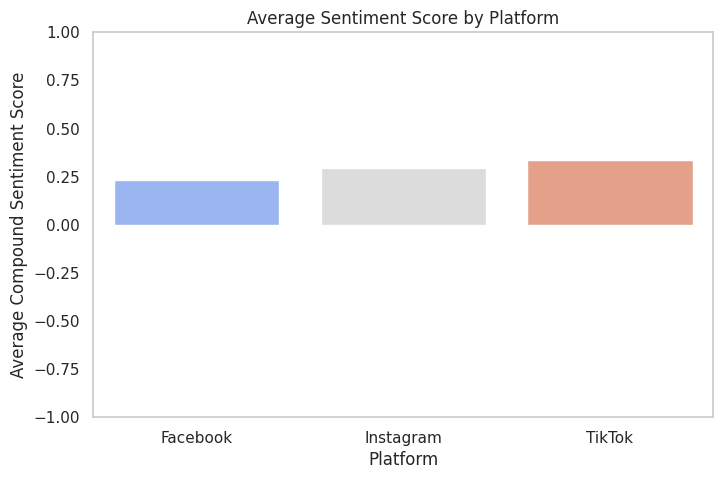

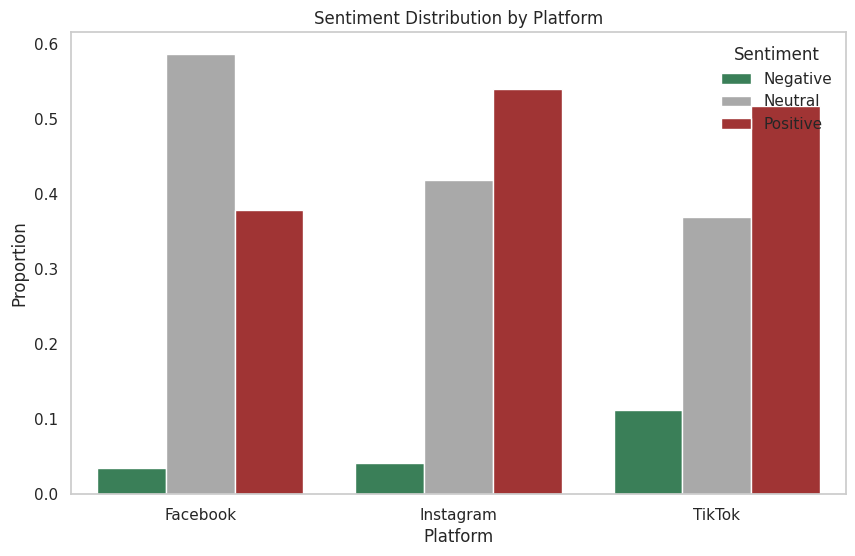

In [171]:
import seaborn as sns

# Average compound sentiment by platform
avg_sentiment = df_sm.groupby('source')['final_sentiment_score'].mean().reset_index()

# For sentiment score
custom_palette = {
    "Positive": "#B22222",  # Dark red for Positive
    "Neutral": "#A9A9A9",
    "Negative": "#2E8B57"
}

plt.figure(figsize=(8,5))
sns.barplot(data=avg_sentiment, x='source', y='final_sentiment_score', palette='coolwarm')
plt.title('Average Sentiment Score by Platform')
plt.ylabel('Average Compound Sentiment Score')
plt.xlabel('Platform')
plt.grid(False)
plt.ylim(-1,1)
plt.show()

# Sentiment label distribution per platform
sentiment_dist = df_sm.groupby(['source', 'sentiment_label']).size().reset_index(name='count')
total_counts = df_sm.groupby('source').size().reset_index(name='total')

sentiment_dist = sentiment_dist.merge(total_counts, on='source')
sentiment_dist['proportion'] = sentiment_dist['count'] / sentiment_dist['total']

plt.figure(figsize=(10,6))
sns.barplot(data=sentiment_dist, x='source', y='proportion', hue='sentiment_label', palette=custom_palette)
plt.title('Sentiment Distribution by Platform')
plt.ylabel('Proportion')
plt.xlabel('Platform')
plt.legend(title='Sentiment')
plt.grid(False)
plt.show()


#### Language Style
Slang, Emojis, Hashtags Counts per Platform : Count slang terms, emojis, and hashtags used per platform


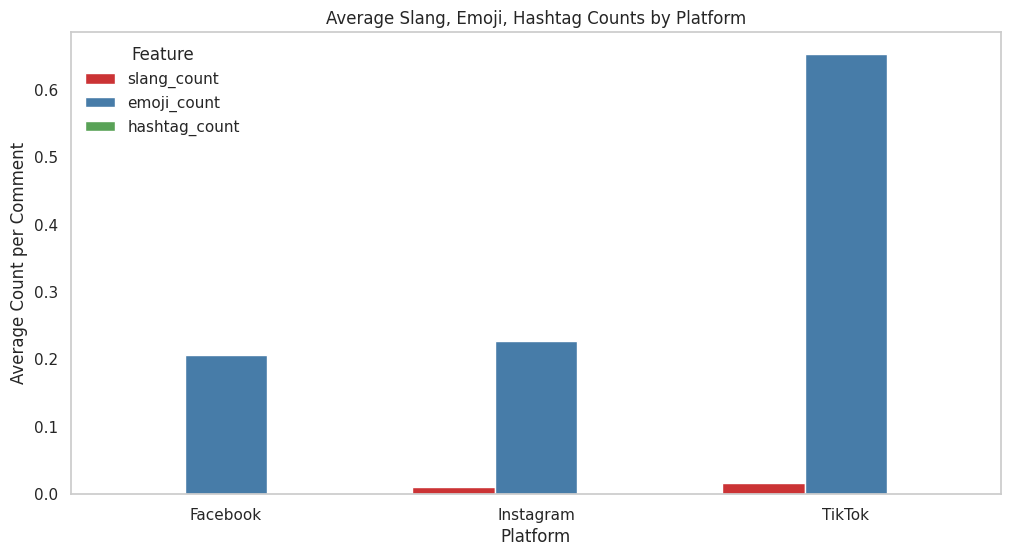

In [172]:
import re
import emoji
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Simple slang list
slang_words = ['lol', 'omg', 'brb', 'wtf', 'tbh', 'idk', 'smh', 'afaik', 'fomo']

# Function to count slang words
def count_slangs(text):
    text = str(text).lower()
    return sum(text.count(s) for s in slang_words)

# Improved function to count emojis using emoji library
def count_emojis(text):
    return len([char for char in str(text) if char in emoji.EMOJI_DATA])

# Function to count hashtags
def count_hashtags(text):
    return len(re.findall(r'#\w+', str(text)))

# Apply the functions to your dataframe
df_sm['slang_count'] = df_sm['clean_comment'].apply(count_slangs)
df_sm['emoji_count'] = df_sm['clean_comment'].apply(count_emojis)
df_sm['hashtag_count'] = df_sm['clean_comment'].apply(count_hashtags)

# Aggregate average counts per platform
lang_features = df_sm.groupby('source')[['slang_count', 'emoji_count', 'hashtag_count']].mean().reset_index()

# Prepare for plotting
lang_features_melt = lang_features.melt(
    id_vars='source',
    var_name='Feature',
    value_name='Average Count'
)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=lang_features_melt, x='source', y='Average Count', hue='Feature', palette='Set1')
plt.title('Average Slang, Emoji, Hashtag Counts by Platform')
plt.ylabel('Average Count per Comment')
plt.xlabel('Platform')
plt.grid(False)
plt.show()



#### Topic & Theme Variation by Platform
Show theme counts per platform and proportions for easier comparison

/tmp/ipython-input-173-1127334096.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=engagement_platform, x='source', y='engagement_count', palette='Set2')


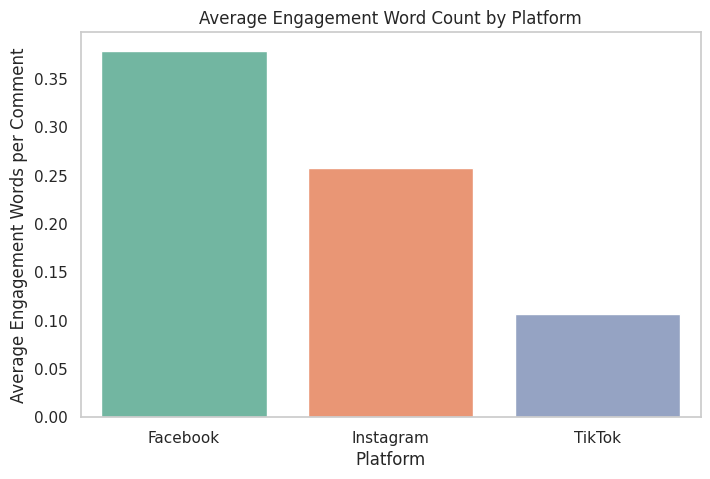

In [173]:
engagement_keywords = ['thanks', 'thank', 'love', 'haha', 'lol', 'please', 'wow', 'amazing', 'cute', 'funny']

def count_engagement_words(text):
    text = str(text).lower()
    return sum(text.count(word) for word in engagement_keywords)

df_sm['engagement_count'] = df_sm['clean_comment'].apply(count_engagement_words)

engagement_platform = df_sm.groupby('source')['engagement_count'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=engagement_platform, x='source', y='engagement_count', palette='Set2')
plt.title('Average Engagement Word Count by Platform')
plt.ylabel('Average Engagement Words per Comment')
plt.xlabel('Platform')
plt.grid(False)
plt.show()


#### Average Comment Length Per Platform
Reveal how language style, tone, and emotional expression differ across platforms — even when discussing similar themes.


/tmp/ipython-input-174-4053361967.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_length, x='source', y='comment_length', palette='Set2')


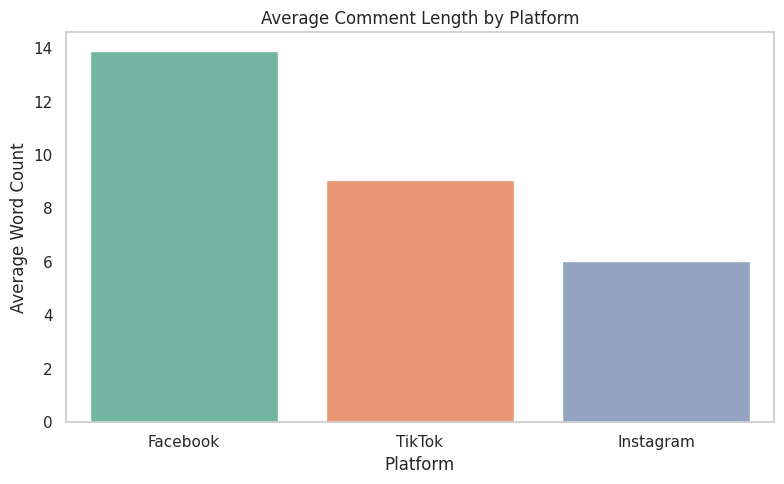

In [174]:
# Add a column for word count
df_sm['comment_length'] = df_sm['clean_comment'].str.split().str.len()

# Group by platform (source) and calculate average
avg_length = df_sm.groupby('source')['comment_length'].mean().reset_index().sort_values(by='comment_length', ascending=False)

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(data=avg_length, x='source', y='comment_length', palette='Set2')
plt.title('Average Comment Length by Platform')
plt.ylabel('Average Word Count')
plt.xlabel('Platform')
plt.tight_layout()
plt.grid(False)
plt.show()


#### Cross Tab : Platform x Theme x Sentiment : Postive, Negative & Neutral

In [175]:
# Create a 3D crosstab of source (platform) x sentiment x theme
crosstab = pd.crosstab(
    index=[df_sm['source'], df_sm['sentiment_label']],
    columns=df_sm['theme']
)

# Reset index for easy visualization (optional)
crosstab_reset = crosstab.reset_index()

# View the table
crosstab.head()

theme                      high_approval  ingredient_concern  other  \
source    sentiment_label                                             
Facebook  Negative                     1                   0      0   
          Neutral                      1                   0     15   
          Positive                     8                   0      1   
Instagram Negative                    15                   3     20   
          Neutral                     99                  12    351   

theme                      packaging_issue  price_value  product_mismatch  \
source    sentiment_label                                                   
Facebook  Negative                       0            0                 0   
          Neutral                        1            0                 0   
          Positive                       0            0                 1   
Instagram Negative                       9            3                 7   
          Neutral                       24            5                78   

theme                      retailer_reference  taste_issue  
source    sentiment_label                                   
Facebook  Negative                          0            0  
          Neutral                           0            0  
          Positive                          0            1  
Instagram Negative                          0            1  
          Neutral                           1           14

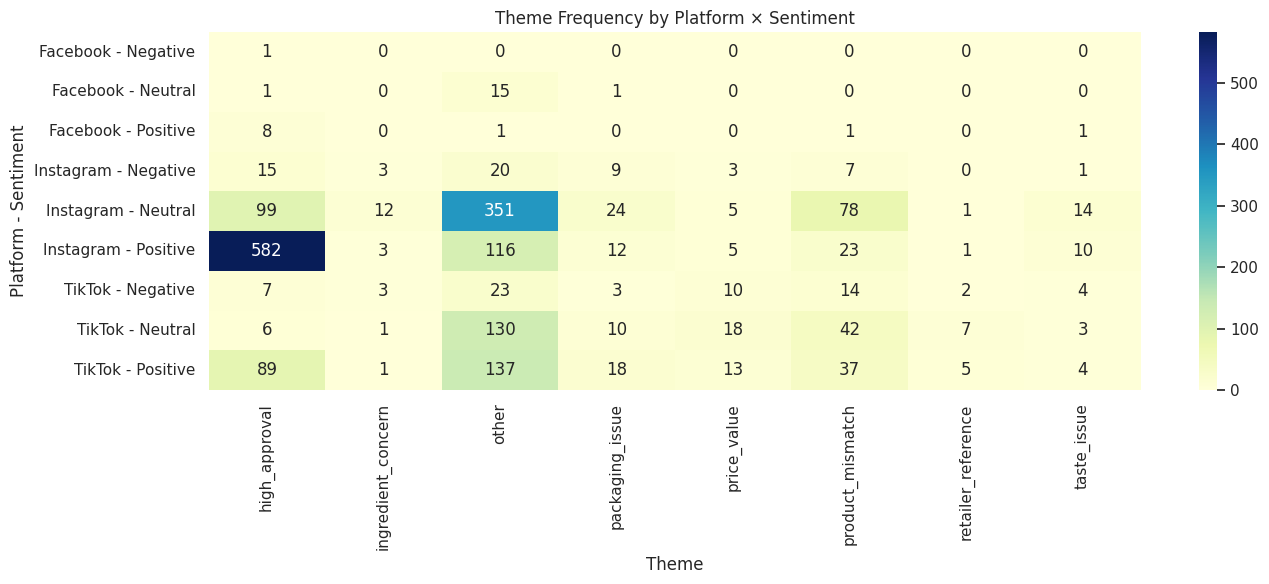

In [176]:
# Optional: Pivot to visualize in heatmap form
heatmap_data = crosstab.copy()
heatmap_data.index = [f'{plat} - {sent}' for plat, sent in heatmap_data.index]

plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Theme Frequency by Platform × Sentiment')
plt.ylabel('Platform - Sentiment')
plt.xlabel('Theme')
plt.tight_layout()
plt.show()

Instagram is the most active platform

Dominates in positive feedback, but also high in neutral taste and mismatch issues

TikTok has high product mismatch negativity

Could mean TikTok users are critical of flavor expectations vs visuals

Facebook has very little data

Could be due to fewer Facebook comments collected, or lower engagement

In [177]:
crosstab_reset.head() # to recheck the above heatmap is correct - why is pos feedback coming as negative sentiment ?? - recheck this

theme,source,sentiment_label,high_approval,ingredient_concern,other,packaging_issue,price_value,product_mismatch,retailer_reference,taste_issue
0,Facebook,Negative,1,0,0,0,0,0,0,0
1,Facebook,Neutral,1,0,15,1,0,0,0,0
2,Facebook,Positive,8,0,1,0,0,1,0,1
3,Instagram,Negative,15,3,20,9,3,7,0,1
4,Instagram,Neutral,99,12,351,24,5,78,1,14


In [178]:
df_sm.groupby(['theme', 'sentiment_label']).size().unstack().fillna(0)

sentiment_label,Negative,Neutral,Positive
theme,,,
high_approval,23,106,679
ingredient_concern,6,13,4
other,43,496,254
packaging_issue,12,35,30
price_value,13,23,18
product_mismatch,21,120,61
retailer_reference,2,8,6
taste_issue,5,17,15


#### Cross Tab : Sentiment x Platform

In [179]:
# Create sentiment x platform crosstab
sentiment_crosstab = pd.crosstab(df_sm['source'], df_sm['sentiment_label'])

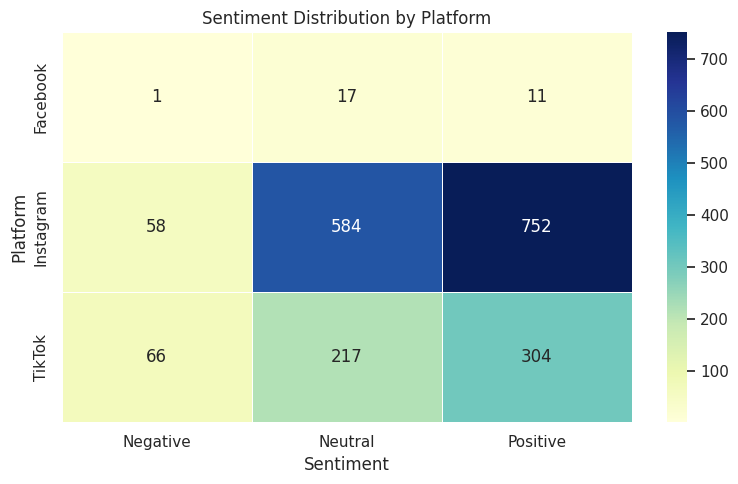

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.heatmap(sentiment_crosstab, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5)
plt.title('Sentiment Distribution by Platform')
plt.xlabel('Sentiment')
plt.ylabel('Platform')
plt.tight_layout()
plt.show()

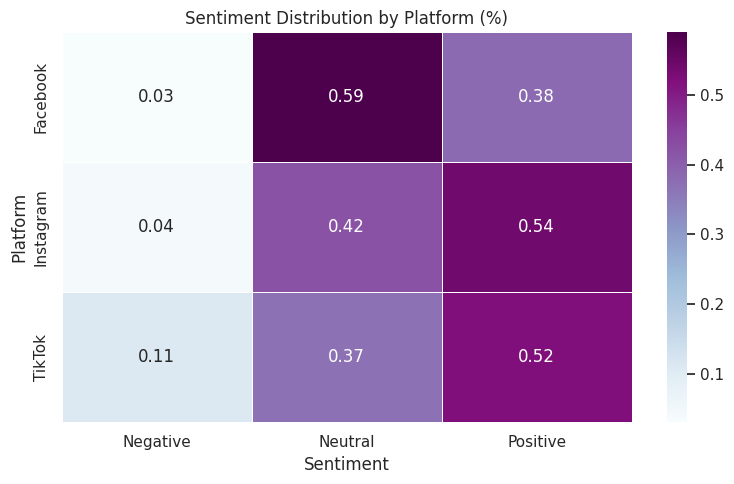

In [181]:
# Normalize to show row-wise percentages
sentiment_pct = sentiment_crosstab.div(sentiment_crosstab.sum(axis=1), axis=0).round(2)

plt.figure(figsize=(8, 5))
sns.heatmap(sentiment_pct, annot=True, fmt='.2f', cmap='BuPu', linewidths=0.5)
plt.title('Sentiment Distribution by Platform (%)')
plt.xlabel('Sentiment')
plt.ylabel('Platform')
plt.tight_layout()
plt.show()

In [182]:
df_sm.shape

(2010, 14)

# **Viral Posts Analysis**

In [183]:
df_sm.columns

Index(['comment', 'source', 'clean_comment', 'emoji_sentiment_score',
       'vader_score', 'slang_sentiment_score', 'final_sentiment_score',
       'sentiment_label', 'theme', 'slang_count', 'emoji_count',
       'hashtag_count', 'engagement_count', 'comment_length'],
      dtype='object')

In [184]:
# Sort comments by engagement_count descending
top_comments = df_sm.sort_values(by='engagement_count', ascending=False).head(10)
print(top_comments[['clean_comment', 'engagement_count', 'source']])

                                          clean_comment  engagement_count  \
2392  thank you josh for the opportunity to try all ...                 5   
1553  ♥️*wow*♥️ id love love love to be your lucky w...                 4   
1684  hi i just sent you a message please check your...                 3   
1298  hey there i just wanted to say that you have s...                 3   
845                                   love love love it                 3   
1172  hahaha thanks got me giggling to myself at wor...                 3   
37                                       love love love                 3   
1395  thanks for sharing would you mind if we use th...                 3   
1943                                     hahahahahahaha                 3   
238   thank you for this we used to get you from hb ...                 3   

         source  
2392   Facebook  
1553  Instagram  
1684  Instagram  
1298  Instagram  
845   Instagram  
1172  Instagram  
37    Instagram  
1395  In

# **Viral Comment Patterns**


In [185]:
# Define viral threshold – 90th percentile of engagement
viral_threshold = df_sm['engagement_count'].quantile(0.90)

# Create a new column: True if viral, else False
df_sm['is_viral'] = df_sm['engagement_count'] >= viral_threshold

# Quick check
df_sm['is_viral'].value_counts()


,count
is_viral,
False,1665
True,345


In [186]:
# Group by viral vs not viral
viral_summary = df_sm.groupby('is_viral')[['emoji_count', 'slang_count', 'comment_length',
                                           'final_sentiment_score']].mean().round(2)

# Optional: add platform breakdown too
platform_summary = df_sm.groupby(['is_viral', 'source'])['engagement_count'].mean().round(2)

print(" Average Features for Viral vs Non-Viral Comments:\n", viral_summary)
print("\n Avg Engagement by Platform & Viral Status:\n", platform_summary)

 Average Features for Viral vs Non-Viral Comments:
           emoji_count  slang_count  comment_length  final_sentiment_score
is_viral                                                                 
False            0.38         0.01            6.19                   0.26
True             0.23         0.02           11.10                   0.51

 Avg Engagement by Platform & Viral Status:
 is_viral  source   
False     Facebook     0.00
          Instagram    0.00
          TikTok       0.00
True      Facebook     1.83
          Instagram    1.26
          TikTok       1.15
Name: engagement_count, dtype: float64


#### Line Plot

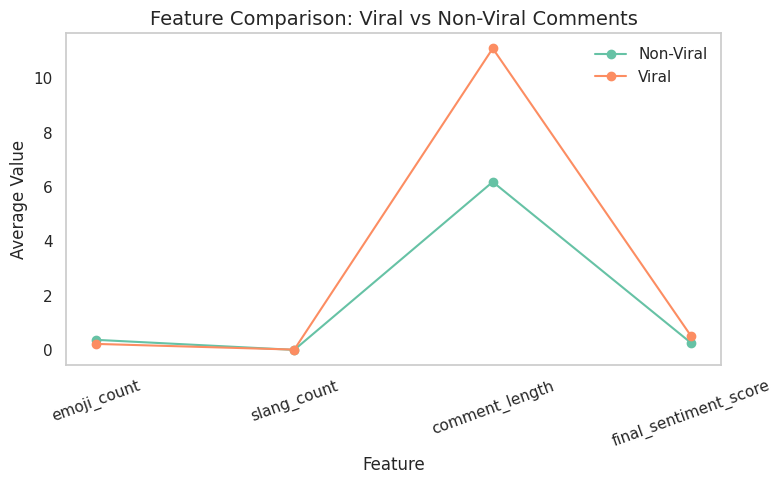

In [187]:
# Transpose the summary
plot_data = viral_summary.T

# Plot
plt.figure(figsize=(8, 5))
plt.plot(plot_data.index, plot_data[False], marker='o', label='Non-Viral', color='#66c2a5')
plt.plot(plot_data.index, plot_data[True], marker='o', label='Viral', color='#fc8d62')

# Labels and styling
plt.title("Feature Comparison: Viral vs Non-Viral Comments", fontsize=14)
plt.xlabel("Feature", fontsize=12)
plt.ylabel("Average Value", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=20)
plt.tight_layout()
plt.grid(False)
plt.show()


#### 100% Stacked Bar Chart: Viral % by Comment Length


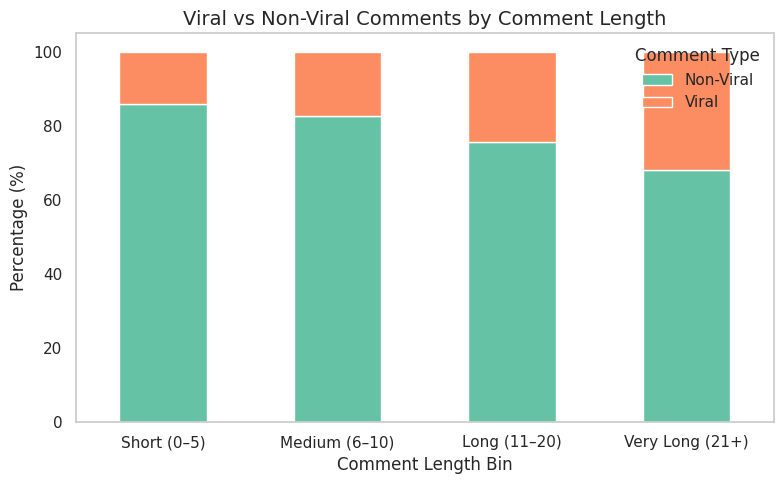

In [188]:
# Step 1: Bin comments by length
bins = [0, 5, 10, 20, 100]  # You can adjust as needed
labels = ['Short (0–5)', 'Medium (6–10)', 'Long (11–20)', 'Very Long (21+)']
df_sm['length_bin'] = pd.cut(df_sm['comment_length'], bins=bins, labels=labels)

# Step 2: Cross-tab of viral status by length bin
crosstab = pd.crosstab(df_sm['length_bin'], df_sm['is_viral'], normalize='index') * 100  # % per bin

# Step 3: Plot
crosstab.plot(kind='bar', stacked=True, color=['#66c2a5', '#fc8d62'], figsize=(8, 5))

# Labels and styling
plt.title("Viral vs Non-Viral Comments by Comment Length", fontsize=14)
plt.xlabel("Comment Length Bin")
plt.ylabel("Percentage (%)")
plt.legend(["Non-Viral", "Viral"], title="Comment Type")
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(False)
plt.show()

#### Annotated Summary Table

In [189]:
# Define color function for highlighting higher values
def highlight_higher(val):
    if val.name == True:
        return ['background-color: #fddbc7' if v > viral_summary.loc[False][i] else ''
                for i, v in enumerate(val)]
    else:
        return ['' for _ in val]

# Transpose for better display (optional)
styled_summary = viral_summary.style \
    .format("{:.2f}") \
    .set_caption("📋 Feature Averages: Viral vs Non-Viral Comments") \
    .set_table_styles([{
        'selector': 'caption',
        'props': [('color', '#333'), ('font-size', '14px'), ('text-align', 'center'), ('font-weight', 'bold')]
    }]) \
    .apply(highlight_higher, axis=1) \
    .background_gradient(cmap='Blues', axis=0) \
    .set_properties(**{'text-align': 'center'}) \
    .set_table_attributes('style="border-collapse:collapse; width:60%; margin:auto;"')

styled_summary


/tmp/ipython-input-189-3594269555.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return ['background-color: #fddbc7' if v > viral_summary.loc[False][i] else ''


,emoji_count,slang_count,comment_length,final_sentiment_score
is_viral,,,,
False,0.38,0.01,6.19,0.26
True,0.23,0.02,11.10,0.51


In [190]:
df_insta.columns

Index(['comment', 'commentatorProfilePicUrl', 'commentatorUserName',
       'postInfo/alt', 'postInfo/caption', 'postInfo/coauthorProducers/0/id',
       'postInfo/coauthorProducers/0/is_verified',
       'postInfo/coauthorProducers/0/profile_pic_url',
       'postInfo/coauthorProducers/0/username',
       'postInfo/coauthorProducers/1/id',
       ...
       'postInfo/taggedUsers/9/profile_pic_url',
       'postInfo/taggedUsers/9/username', 'postInfo/timestamp',
       'postInfo/type', 'postInfo/url', 'postInfo/videoDuration',
       'postInfo/videoPlayCount', 'postInfo/videoUrl',
       'postInfo/videoViewCount', 'source'],
      dtype='object', length=156)

In [191]:
df_facebook.columns

Index(['commentsCount', 'date', 'facebookId', 'facebookUrl', 'id', 'inputUrl',
       'isRecommended', 'legacyId', 'likesCount', 'pageAdLibrary/id',
       'pageAdLibrary/is_business_page_active', 'pageName',
       'photos/0/__typename', 'photos/0/accessibility_caption', 'photos/0/id',
       'photos/0/image/height', 'photos/0/image/uri', 'photos/0/image/width',
       'photos/0/is_playable', 'photos/0/owner/__typename',
       'photos/0/owner/id', 'photos/0/url', 'photos/0/viewer_image/height',
       'photos/0/viewer_image/uri', 'photos/0/viewer_image/width',
       'photos/1/__typename', 'photos/1/accessibility_caption', 'photos/1/id',
       'photos/1/image/height', 'photos/1/image/uri', 'photos/1/image/width',
       'photos/1/is_playable', 'photos/1/owner/__typename',
       'photos/1/owner/id', 'photos/1/url', 'photos/1/viewer_image/height',
       'photos/1/viewer_image/uri', 'photos/1/viewer_image/width',
       'photos/2/__typename', 'photos/2/accessibility_caption', 'photos

In [192]:
df_tiktok.columns

Index(['avatarThumbnail', 'cid', 'createTime', 'createTimeISO',
       'detailedMentions/0/nickName', 'detailedMentions/0/profileUrl',
       'detailedMentions/0/secUid', 'detailedMentions/0/userId',
       'detailedMentions/1/nickName', 'detailedMentions/1/profileUrl',
       'detailedMentions/1/secUid', 'detailedMentions/1/userId',
       'detailedMentions/2/nickName', 'detailedMentions/2/profileUrl',
       'detailedMentions/2/secUid', 'detailedMentions/2/userId', 'diggCount',
       'input', 'likedByAuthor', 'mentions/0', 'mentions/1', 'mentions/2',
       'pinnedByAuthor', 'repliesToId', 'replyCommentTotal', 'comment', 'uid',
       'uniqueId', 'videoWebUrl', 'source'],
      dtype='object')

In [193]:
# Add post_id column in each source-specific dataframe
df_insta['post_id'] = df_insta['postInfo/id']
df_facebook['post_id'] = df_facebook['facebookId']
df_tiktok['post_id'] = df_tiktok['cid']

In [194]:
# Get the matching post_id values using the original df_insta index
df_viral_insta = df_sm[df_sm['source'] == 'Instagram'].copy()

# Use the index of df_viral_insta to pull matching post IDs from df_insta
df_viral_insta['post_id'] = df_insta.loc[df_viral_insta.index, 'postInfo/id'].values


In [195]:
df_virals_insta = df_viral_insta.groupby('post_id').agg({
    'engagement_count': 'sum',
    'comment_length': 'mean',
    'emoji_count': 'mean',
    'slang_count': 'mean',
    'final_sentiment_score': 'mean',
    'sentiment_label': lambda x: x.mode()[0] if not x.mode().empty else None
}).reset_index()
df_virals_insta['platform'] = 'Instagram'


In [196]:
# Reset index so positions align
df_viral_fb = df_sm[df_sm['source'] == 'Facebook'].copy().reset_index(drop=True)
df_facebook = df_facebook.reset_index(drop=True)

# Assign post ID by position (safe since you've matched source lengths)
df_viral_fb['post_id'] = df_facebook.loc[df_viral_fb.index, 'id'].values


In [197]:
df_virals_fb = df_viral_fb.groupby('post_id').agg({
    'engagement_count': 'sum',
    'comment_length': 'mean',
    'emoji_count': 'mean',
    'slang_count': 'mean',
    'final_sentiment_score': 'mean',
    'sentiment_label': lambda x: x.mode()[0] if not x.mode().empty else None
}).reset_index()

df_virals_fb['platform'] = 'Facebook'


In [198]:
# Step 1: Filter TikTok rows from df_sm
df_viral_tiktok = df_sm[df_sm['source'] == 'TikTok'].copy().reset_index(drop=True)

# Step 2: Reset TikTok source DataFrame index (if not already reset)
df_tiktok = df_tiktok.reset_index(drop=True)

# Step 3: Assign post ID from df_tiktok
df_viral_tiktok['post_id'] = df_tiktok.loc[df_viral_tiktok.index, 'cid'].values


In [199]:
df_virals_tiktok = df_viral_tiktok.groupby('post_id').agg({
    'engagement_count': 'sum',
    'comment_length': 'mean',
    'emoji_count': 'mean',
    'slang_count': 'mean',
    'final_sentiment_score': 'mean',
    'sentiment_label': lambda x: x.mode()[0] if not x.mode().empty else None
}).reset_index()

df_virals_tiktok['platform'] = 'TikTok'


In [200]:
df_post_level = pd.concat([df_virals_insta, df_virals_fb, df_virals_tiktok], ignore_index=True)


In [201]:
# Example: Viral if total engagement > 75th percentile
threshold = df_post_level['engagement_count'].quantile(0.75)

df_post_level['is_viral'] = df_post_level['engagement_count'] > threshold


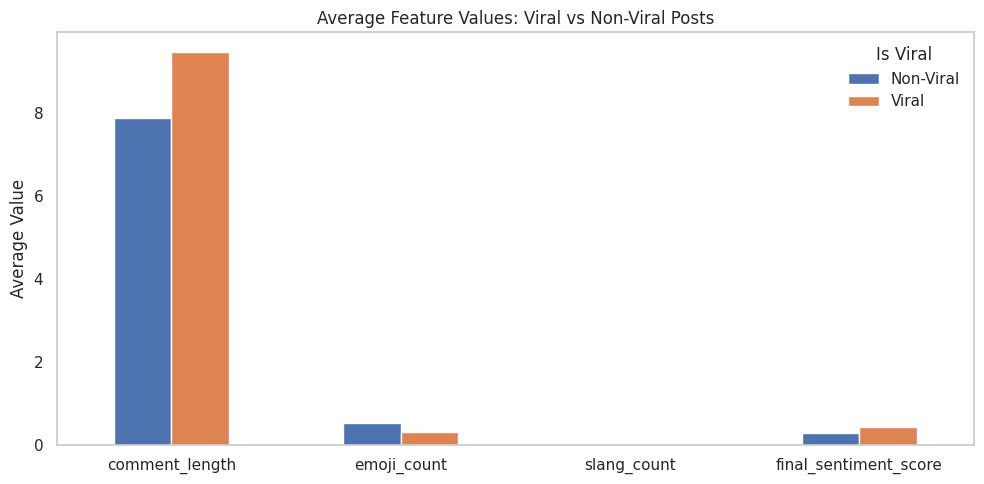

In [202]:
import matplotlib.pyplot as plt

features = ['comment_length', 'emoji_count', 'slang_count', 'final_sentiment_score']
averages = df_post_level.groupby('is_viral')[features].mean().T

averages.plot(kind='bar', figsize=(10, 5))
plt.title("Average Feature Values: Viral vs Non-Viral Posts")
plt.ylabel("Average Value")
plt.xticks(rotation=0)
plt.legend(title="Is Viral", labels=["Non-Viral", "Viral"])
plt.tight_layout()
plt.grid(False)
plt.show()


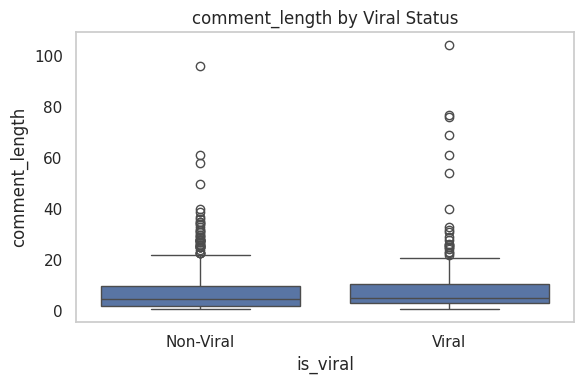

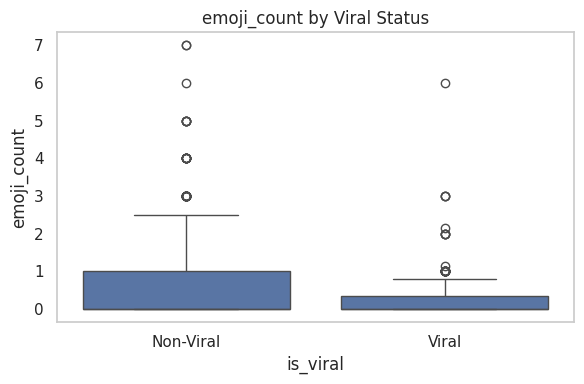

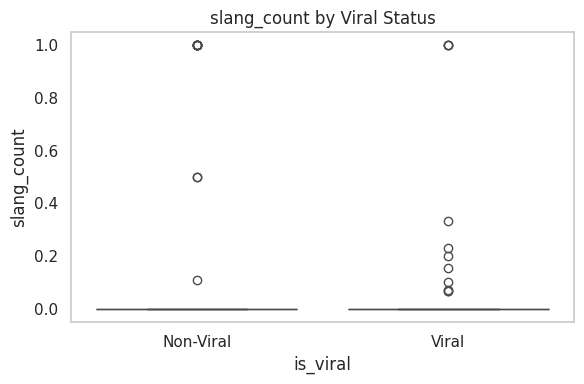

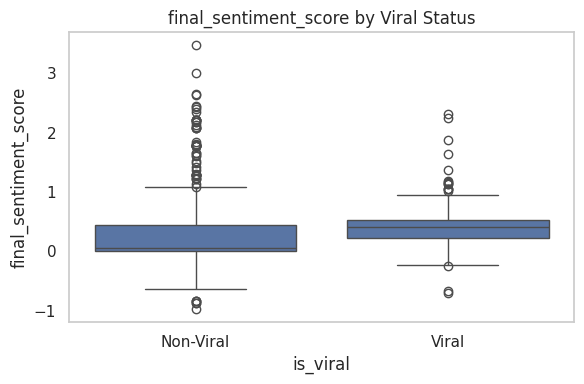

In [203]:
import seaborn as sns

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df_post_level, x='is_viral', y=feature)
    plt.title(f"{feature} by Viral Status")
    plt.xticks([0, 1], ['Non-Viral', 'Viral'])
    plt.tight_layout()
    plt.grid(False)
    plt.show()


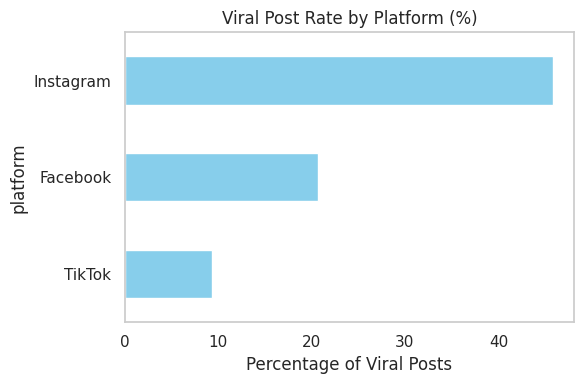

In [204]:
viral_by_platform = df_post_level.groupby('platform')['is_viral'].mean() * 100
viral_by_platform.sort_values().plot(kind='barh', figsize=(6,4), color='skyblue')
plt.title("Viral Post Rate by Platform (%)")
plt.xlabel("Percentage of Viral Posts")
plt.tight_layout()
plt.grid(False)
plt.show()


In [205]:
# Make sure each post has its platform labeled
df_post_level['platform'] = df_post_level['platform'].fillna('Unknown')


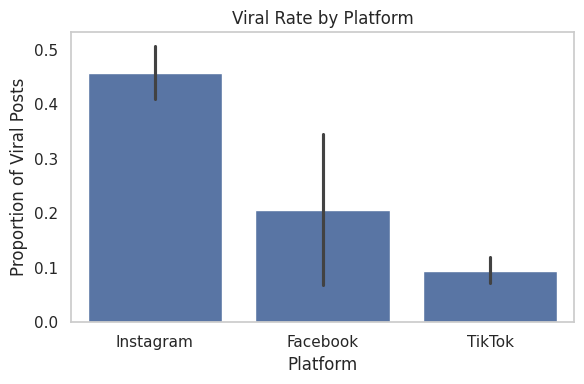

In [206]:
plt.figure(figsize=(6,4))
sns.barplot(data=df_post_level, x='platform', y='is_viral', estimator='mean')
plt.title("Viral Rate by Platform")
plt.ylabel("Proportion of Viral Posts")
plt.xlabel("Platform")
plt.tight_layout()
plt.grid(False)
plt.show()


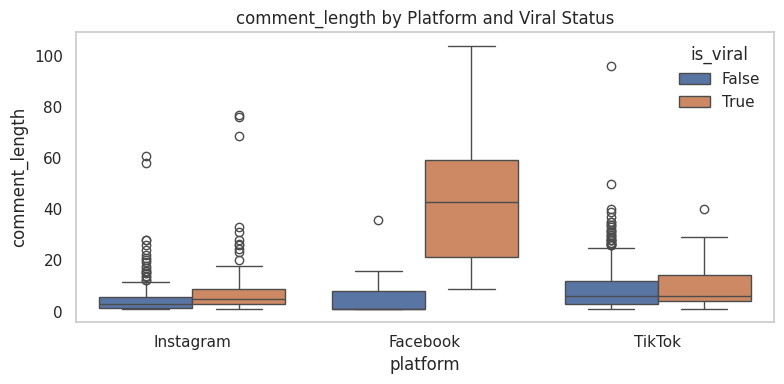

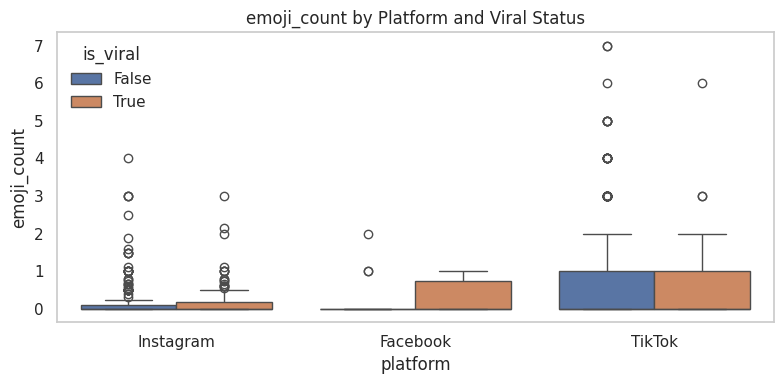

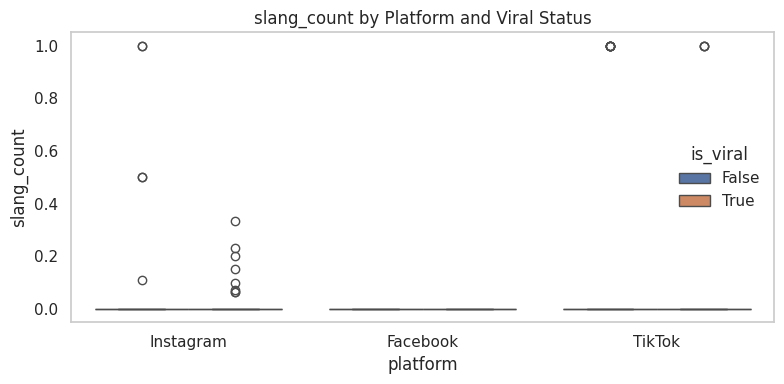

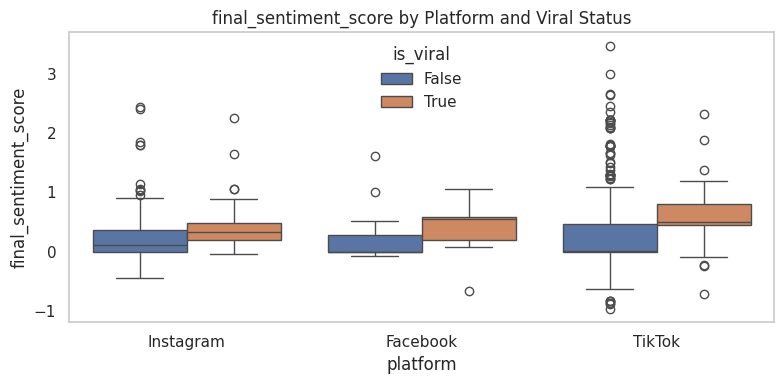

In [207]:
features = ['comment_length', 'emoji_count', 'slang_count', 'final_sentiment_score']

for feature in features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df_post_level, x='platform', y=feature, hue='is_viral')
    plt.title(f"{feature} by Platform and Viral Status")
    plt.tight_layout()
    plt.grid(False)
    plt.show()
